# Análisis para campañas y estrategias de 2017


La tienda online Ice vende videojuegos por todo el mundo. Las reseñas de usuarios y expertos, los géneros, las plataformas (por ejemplo, Xbox o PlayStation) y los datos históricos sobre las ventas de juegos están disponibles en fuentes abiertas. Tienes que identificar patrones que determinen si un juego tiene éxito o no. Esto te permitirá detectar proyectos prometedores y planificar campañas publicitarias. Los datos se remontan a 2016


El dataset contiene la abreviatura ESRB. The Entertainment Software Rating Board (la Junta de clasificación de software de entretenimiento) evalúa el contenido de un juego y asigna una clasificación de edad como Adolescente o Adulto.

### Análisis a realizar 
1. Mira cuántos juegos fueron lanzados en diferentes años. ¿Son significativos los datos de cada período? 
2. Observa cómo varían las ventas de una plataforma a otra. Elige las plataformas con las mayores ventas totales y construye una distribución basada en los datos de cada año. Busca las plataformas que solían ser populares pero que ahora no tienen ventas. ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?
3. Determina para qué período debes tomar datos. Para hacerlo mira tus respuestas a las preguntas anteriores. Los datos deberían permitirte construir un modelo para 2017.. 
4. Trabaja solo con los datos que consideras relevantes. Ignora los datos de años anteriores.
5. ¿Qué plataformas son líderes en ventas? ¿Cuáles crecen y cuáles se reducen? Elige varias plataformas potencialmente rentables.
6. Crea un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma. ¿Son significativas las diferencias en las ventas? ¿Qué sucede con las ventas promedio en varias plataformas? Describe tus hallazgos.
7. Mira cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular (tu elección). Crea un gráfico de dispersión y calcula la correlación entre las reseñas y las ventas. Saca conclusiones.
8. Teniendo en cuenta tus conclusiones compara las ventas de los mismos juegos en otras plataformas.
9. Echa un vistazo a la distribución general de los juegos por género. ¿Qué se puede decir de los géneros más rentables? ¿Puedes generalizar acerca de los géneros con ventas altas y bajas?

### Creación de perfil de usuario por región 
Para cada región (NA, UE, JP) determina:
* Las cinco plataformas principales. Describe las variaciones en sus cuotas de mercado de una región a otra.
* Los cinco géneros principales. Explica la diferencia.
* Si las clasificaciones de ESRB afectan a las ventas en regiones individuales.

### Prueba de hipótesis 
+ Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.
+ Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.
### Establece tu mismo el valor de umbral alfa. Explica:
+ Cómo formulaste las hipótesis nula y alternativa.
+ Qué criterio utilizaste para probar las hipótesis y por qué

### Descripción de Datos 
1. Name (Nombre)
2. Platform (Plataforma)
3. Year_of_Release (Año de lanzamiento)
4. Genre (Género) 
5. NA_sales (ventas en Norteamérica en millones de dólares estadounidenses) 
6. EU_sales (ventas en Europa en millones de dólares estadounidenses) 
7. JP_sales (ventas en Japón en millones de dólares estadounidenses) 
8. Other_sales (ventas en otros países en millones de dólares estadounidenses) 
9. Critic_Score (máximo de 100) 
10. User_Score (máximo de 10) 
11. Clasificación (ESRB) \
Es posible que los datos de 2016 estén incompletos.

In [43]:
# Importar las librerías a utilizar 
import pandas as pd 
import matplotlib.pyplot as plt 
from scipy import stats as st 
import math 
import seaborn as sns 

### Carga y Visualización de datos 

In [44]:
# Se crea el dataframe "video_games"
video_games = pd.read_csv("games.csv")
video_games

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


### Preprocesamiento de datos 

In [45]:
# Obtener información general de los datos, cuantas columnas y valores hay, tipo de datos y comprobación si hay datos ausentes
video_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [46]:
# Convertir los nombres de las columnas a minúsculas 
video_games.columns = video_games.columns.str.lower()

# Cambiar el tipo de datos de "user_score" a tipo númerico 
video_games['user_score'] = pd.to_numeric(video_games['user_score'], errors='coerce')

# Reemplazar los valores ausentes de las tablas
# Se cambian los valores ausentes de las columnas "name" y "genre" a la cadena "Unknown"
video_games["name"].fillna("Unknown",inplace=True)
video_games["genre"].fillna("Unkownn", inplace=True)
 
video_games['year_of_release'] = pd.to_numeric(video_games['year_of_release'], errors='coerce')
# Se asegura que las columnas referentes a la puntuación de tanto usuarios como críticos sean de tipo númerico
# Se decide trabajar con valores ausentes en ambas ya que no muestran ser un problema para los futuros análisis 
video_games["critic_score"] ==  pd.to_numeric(video_games['critic_score'], errors='coerce')
video_games["user_score"] ==  pd.to_numeric(video_games['user_score'], errors='coerce')
# Se cambian los valores ausentes de la columna "rating" a la cadena "RP" que ya es un valor indicado de estas clasificaciones, ya que RP significa que no hay clasificación de la misma manera que con los valores ausentes 
video_games["rating"].fillna("RP", inplace=True)



In [47]:
# Comprobar los cambios en una vista rápida de los datos
video_games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,RP
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,RP
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,RP
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,RP
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,RP
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,RP


In [48]:
# Creación de las ventas totales de cada juego en la columna "total_sales"
video_games["total_sales"] = video_games["na_sales"] + video_games["eu_sales"] + video_games["jp_sales"] + video_games["other_sales"]
video_games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,RP,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,RP,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,RP,0.01
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,RP,0.01
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,RP,0.01
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,RP,0.01


# Análisis de Datos 

### ¿Cuántos juegos fueron lanzados en diferentes años? ¿Son significativos los datos de cada período?
+ Para responder estas preguntas es necesario contar los valores en la columna "year_of_release" y asi poder ver los años que mas juegos nuevos tuvieron y los que menos.


In [49]:
# Se utiliza el método 'value_counts()' y 'sort_index()' para obtener cuantos juegos fueron publicados cada año y de manera ordenada
games_per_year = video_games["year_of_release"].value_counts().sort_index()
games_per_year

year_of_release
1980.0       9
1981.0      46
1982.0      36
1983.0      17
1984.0      14
1985.0      14
1986.0      21
1987.0      16
1988.0      15
1989.0      17
1990.0      16
1991.0      41
1992.0      43
1993.0      62
1994.0     121
1995.0     219
1996.0     263
1997.0     289
1998.0     379
1999.0     338
2000.0     350
2001.0     482
2002.0     829
2003.0     775
2004.0     762
2005.0     939
2006.0    1006
2007.0    1197
2008.0    1427
2009.0    1426
2010.0    1255
2011.0    1136
2012.0     653
2013.0     544
2014.0     581
2015.0     606
2016.0     502
Name: count, dtype: int64

In [50]:
# Se utiliza el método "describe()" para ver una serie de estadísticas comunes sobre los valores
display(games_per_year.describe())
# Unos datos interesantes a tener son los años donde se publicaron la mayor y menor cantidad de video juegos respectivamente, por lo que buscamos el año con el valor mas bajo y el mas alto
display(games_per_year[games_per_year == 9], games_per_year[games_per_year == 1427])

count      37.000000
mean      444.486486
std       451.557159
min         9.000000
25%        36.000000
50%       338.000000
75%       762.000000
max      1427.000000
Name: count, dtype: float64

year_of_release
1980.0    9
Name: count, dtype: int64

year_of_release
2008.0    1427
Name: count, dtype: int64

Promedio de juegos publicados por año: El promedio de 444 juegos publicados por año indica una cantidad significativa de lanzamientos de juegos a lo largo de estos 37 años. Esto sugiere una industria activa y en constante evolución, con un flujo constante de nuevos títulos cada año.

Desviación estándar de 451.6: Una desviación estándar relativamente alta sugiere una variabilidad considerable en la cantidad de juegos lanzados anualmente. Esto indica que, si bien el promedio es de 444 juegos por año, la cantidad real de lanzamientos puede variar significativamente de año en año. Pueden existir años con lanzamientos muy por encima o por debajo de la media.

Implicaciones para la industria: Esta alta desviación estándar puede indicar fluctuaciones significativas en la industria de los videojuegos, posiblemente asociadas con cambios en las tendencias del mercado, ciclos de consolas, innovaciones tecnológicas o incluso crisis económicas que pueden influir en la producción y lanzamiento de juegos.

Año con la menor cantidad de juegos publicados: 1980 con 9 juegos
Año con la mayor cantidad de juegos publicados: 2008 con 1427 juegos
Esta diferencia notable entre el año con la menor cantidad de juegos publicados (1980) y el año con la mayor cantidad de juegos publicados (2008) destaca la tremenda variabilidad en la producción de juegos a lo largo de los años.

El hecho de que en 1980 se lanzaran solo 9 juegos puede reflejar la etapa inicial de la industria de los videojuegos, donde las capacidades técnicas eran limitadas, y el mercado y la industria aún estaban en desarrollo.

Por otro lado, el gran número de juegos lanzados en 2008 puede atribuirse a varios factores, como avances tecnológicos, la popularidad creciente de los videojuegos, el aumento en la diversidad de plataformas y géneros, así como estrategias comerciales específicas de la industria en ese momento.

In [51]:
# Crear una nueva columna 'decade' basada en 'year_of_release'
games_per_decade = (video_games["year_of_release"] // 10) * 10

# Contar los juegos lanzados en cada década
games_per_decade = games_per_decade.value_counts().sort_index()
display(games_per_decade)


year_of_release
1980.0     205
1990.0    1771
2000.0    9193
2010.0    5277
Name: count, dtype: int64

Para tener mejor entendimiento de los juegos publicados, decidí separarlos por décadas ya que de esa manera podemos ver si hay datos significativos en distintos períodos de tiempo.

La década de 1980 parece haber tenido un número relativamente bajo de lanzamientos, lo que puede deberse a la novedad y la etapa inicial de la industria de los videojuegos.

La década de 1990 muestra un aumento significativo en la cantidad de juegos lanzados, posiblemente impulsado por avances tecnológicos, la popularización de las consolas de videojuegos y el crecimiento del mercado.

La década de 2000 experimentó un salto notable en el número de juegos publicados, lo que podría relacionarse con la evolución de la tecnología, la expansión del mercado global y la diversificación de plataformas y géneros de juegos.

La década de 2010 muestra una cantidad considerable de juegos publicados, lo que sugiere una industria madura y estable, con un flujo constante de lanzamientos a lo largo de la década.

Estos números proporcionan una visión general del crecimiento exponencial de la industria de los videojuegos a lo largo del tiempo y cómo ha evolucionado la producción y el lanzamiento de juegos a lo largo de diferentes décadas.

# Plataformas con las mayores ventas totales y Distribución basada en los datos de cada año

Para este análisis se crearan dos DataFrames a raiz del original, uno que nos muestre el comportamiento general de las ventas totales de cada plataforma y el otro una distribución mas específica a lo largo de los años.

In [52]:
# Se crea platform_sales para tener claro las plataformas con mas ventas totales
platform_sales = video_games.groupby(["platform"])["total_sales"].sum().sort_values(ascending=False).reset_index()
# platform_sales_per_year se crea para visualizar el comportamiento de las ventas de cada plataforma en cada año 
platform_sales_per_year = video_games.groupby(["platform","year_of_release"])["total_sales"].sum().reset_index()
# Se cambia el nombre de la columna del año para mas claridad 
platform_sales_per_year.rename(columns={"year_of_release":"year"}, inplace=True)


In [53]:
platform_sales

,platform,total_sales
0,PS2,1255.77
1,X360,971.42
2,PS3,939.65
3,Wii,907.51
4,DS,806.12
5,PS,730.86
6,GBA,317.85
7,PS4,314.14
8,PSP,294.05
9,PC,259.52


In [54]:
platform_sales_per_year

,platform,year,total_sales
0,2600,1980.0,11.38
1,2600,1981.0,35.68
2,2600,1982.0,28.88
3,2600,1983.0,5.84
4,2600,1984.0,0.27
...,...,...,...
233,XB,2008.0,0.18
234,XOne,2013.0,18.96
235,XOne,2014.0,54.07
236,XOne,2015.0,60.14


Para tener mejor entendimiento de los datos obtenidos anteriormente es necesario crear un gráfico que muestre la distribución de las ventas de las mejores plataformas a lo largo de los años. 

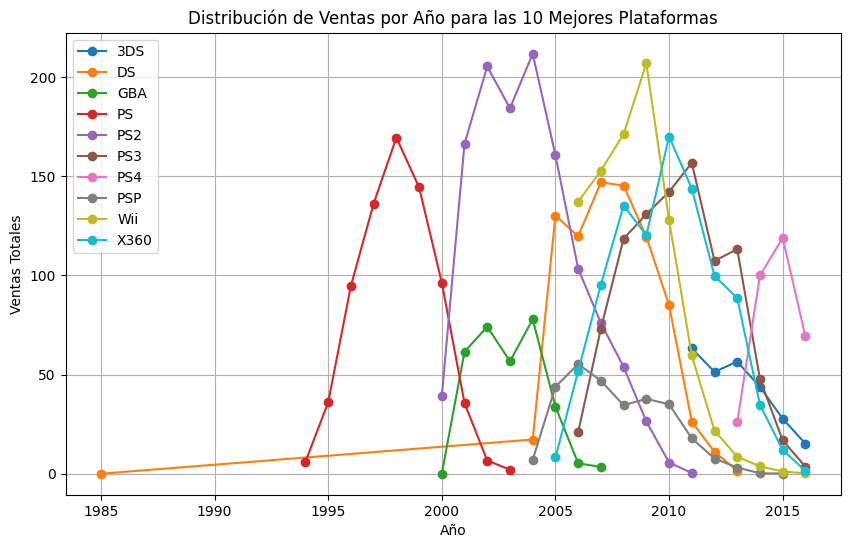

In [55]:
# Calcular las ventas totales por plataforma
total_sales_per_platform = platform_sales_per_year.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

# Obtener las 10 plataformas con mayores ventas totales
top_10_platforms = total_sales_per_platform.head(10)

# Filtrar el DataFrame para las 10 mejores plataformas
top_10_platforms_data = platform_sales_per_year[platform_sales_per_year['platform'].isin(top_10_platforms.index)]

# Construir la distribución basada en los datos de cada año para las 10 mejores plataformas
plt.figure(figsize=(10, 6))

for platform in top_10_platforms_data['platform'].unique():
    platform_data = top_10_platforms_data[top_10_platforms_data['platform'] == platform]
    plt.plot(platform_data['year'], platform_data['total_sales'], marker='o', label=platform)

plt.xlabel('Año')
plt.ylabel('Ventas Totales')
plt.title('Distribución de Ventas por Año para las 10 Mejores Plataformas')
plt.legend()
plt.grid(True)
plt.show()

### ¿Qué plataformas solían ser populares pero ahora no tienen ventas? 

Para saber que plataformas eran populares filtramos los datos para que nos muestre aquellas plataformas presentes entre los años 1990 - 2010 con ventas anueales mayores a 10 millones. No se toman en cuenta las ventas sobre los 10 millones a partir de 2010 ya que la mayoría de plataformas con esos números son nuevas. La condición de ventas sobre 10 millones se toma ya que una plataforma con varios años superando ese valor en sus ventas muestra que tuvo gran alcance global y que gracias a su popularidad se mantuvo fuerte.


In [56]:
# Se crea una nueva variable que muestra las plataformas que tienen ventas anuales mayores a 10 millones
old_platforms = platform_sales_per_year[(platform_sales_per_year["year"] >= 1990) & (platform_sales_per_year["year"] <= 2010) & (platform_sales_per_year["total_sales"] > 10)]
# Se utiliza el método value_counts() para saber cuales son las plataformas con más años por arriba de los 10 millones en ventas en el período determinado 
old_platforms["platform"].value_counts()

platform
PS2     10
DS       7
PC       7
SNES     7
PS       7
GB       6
GC       6
PSP      6
XB       6
N64      5
PS3      5
GBA      5
Wii      5
X360     5
NES      1
GEN      1
SAT      1
Name: count, dtype: int64

Los resultados muestran varias plataformas con gran popularidad a lo largo del período determinado, la más popular es la "PS2" y la menos popular es la "SAT".

Para trabajar con las plataformas que se consideran que eran famosas y que en la actualidad no tienen ventas, tendremos en cuenta el gráfico anterior y el resultado de "old_platfomrs". Primero se descartan aquellas con menos popularidad, se descartan las plataformas "SAT", "GEN" y "NES" ya que solamente tuvieron un año sobre 10 millones en venta durante un período de 20 años. 

Las primera plataforma a tomar en cuenta es la "PS2" por ser la que mas tuvo mas años con ventas sobre los 10 millones, seguida de "DS", "SNES" y su versión anterior "PS" con 7 años. Las primeras 3 plataformas son "PS2", "DS" y "SNES" al ser las que mas años estuvieron por arriba de los 10 millones. No se toma "PC" ya que sus ventas indican equilibrio a lo largo de los años y que en un futuro pueden llegar a crecer, tampoco se toma "PS" ni "PS3" ya que ambas son de la misma compañía que "PS2", siendo esta la más popular entre las 3.

Las siguientes plataformas a tener en cuenta son "Wii" y "N64", la plataforma "Wii" como se ve en el gráfico obtuvo el segundo pico más alto de ventas en un año, luego sus ventas comenzaron a bajar drásticamente y en la actualidad luchan por llegar a un millón al año, esto es un claro indicio de que ha perdido popularidad.

Las últimas plataformas a tomarse en cuenta son la "X360" y "GBA", se escogen estas por encima de sus versiones anteriores "XB" y "GB" ya que a pesar de mostrar tener un año menos con ventas sobre los 10 millones, ambas forman parte de las 10 mejores plataformas en ventas por año, a diferencia de sus versiones anteriores. 

Una vez seleccionadas las plataformas que eran populares y en la actualidad no tienen ventas, se filtra el DataFrame para obtener los datos de cada una

In [57]:
# Se crea una lista con los nombres de las plataformas seleccionadas
selected_platforms = ['DS', 'GBA', 'PS2', 'X360', 'Wii', 'N64', 'SNES']
# Se crea una nueva variable para obseervar las plataformas seleccionadas y se utiliza el metodo .isin() para filtrar los datos requeridos.
selected_old_platforms = old_platforms[old_platforms['platform'].isin(selected_platforms)]
# Se realiza el mismo proceso de filtración con el DataFrame "platform_sales_per_year" para ver la actualidad de estas plataformas 
actuality_old_platforms = platform_sales_per_year[platform_sales_per_year["platform"].isin(selected_platforms)]

In [58]:
# Visualización de la primera filtración 
selected_old_platforms

,platform,year,total_sales
26,DS,2004.0,17.27
27,DS,2005.0,130.14
28,DS,2006.0,119.81
29,DS,2007.0,146.94
30,DS,2008.0,145.31
31,DS,2009.0,119.54
32,DS,2010.0,85.02
50,GBA,2001.0,61.53
51,GBA,2002.0,74.16
52,GBA,2003.0,56.67


Al igual que antes, se crea un gráfico para tener mejor entendimiento de la distribución 

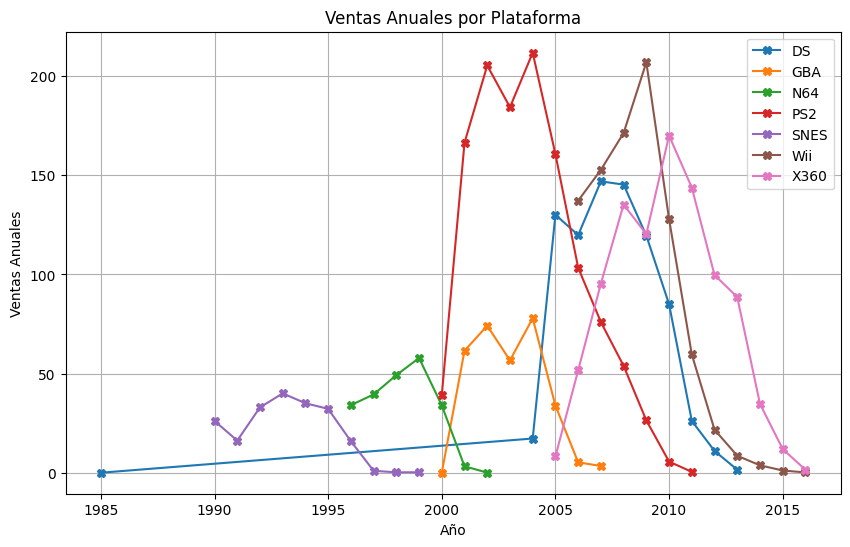

In [59]:
# Se crea un gráfico de líneas que muestre la actualidad de las plataformas anteriormente seleccionadas.

# Gráfico de líneas
plt.figure(figsize=(10, 6))
for platform, platform_data in actuality_old_platforms.groupby('platform'):
    plt.plot(platform_data['year'], platform_data['total_sales'], marker='X', label=platform)

plt.xlabel('Año')
plt.ylabel('Ventas Anuales')
plt.title('Ventas Anuales por Plataforma')
plt.legend()
plt.grid(True)
plt.show()



Los datos obtenidos y el gráfico anterior muestran con claridad que las plataformas seleccionadas eran bastante populares antes de la década deñ 2010, pero que con los avances tecnológicos y el aumento de la competencia han perdido esta popularidad a partir del 2010, de tal manera que varias de estas plataformas no tienen registro de ventas en la actualidad(Año 2016).

### ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?
Para responder esta pregunta se usará el gráfico de las 10 mejores plataformas en ventas por año, se tomarán como ejemplo las plataformas "Playstation" usando sus primeras y últimas versiones para ver como se comportan a lo largo de los años.


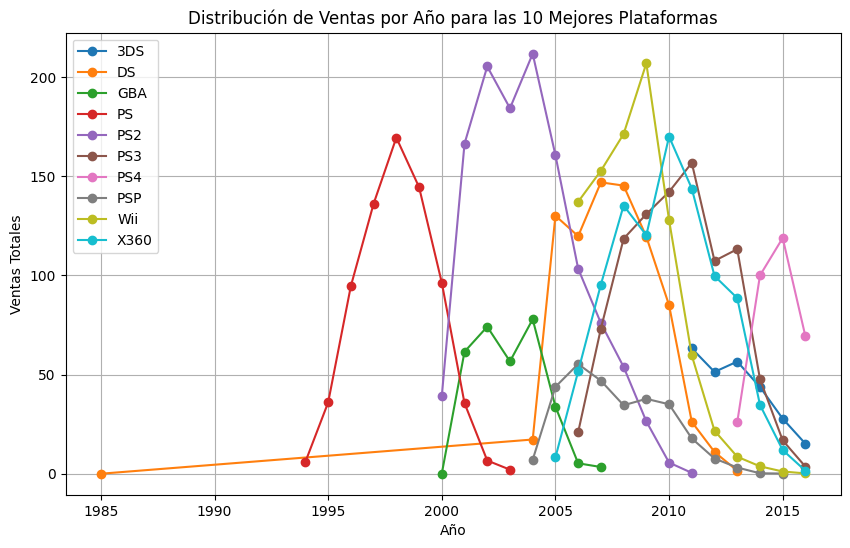       

La primera Playstation "PS" salió en 1994 y desde su primer año ya apuntaba a ser un gran éxito, se mantuvo con muy buenas ventas en el final de la década del 90 y a incios de la década 2000. La nueva versión "PS2" sale en 2000 y trae gran avance tecnológico en comparación a la "PS", por lo que a partir de ese momento la "PS" comienza a desaparecer poco a poco hasta que muestra su último registro en ventas 3 años después del lanzamiento de la "PS2"(2003), pero al igual que su versión anterior desde el primer año apuntaba a ser otro gran éxito y lo termino siendo. La misma historia se repite con la "PS3", desde su lanzamiento en 2006 se observa en el gráfico que la "PS2" viene en picada en cuanto a sus ventas, mientras que la "PS3" cada vez sube más, al final pasa lo mismo con la "PS4".

La historia de las plataformas Playstation es de gran ayuda para saber cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer. Otro factor importante a tener en cuenta es la competencia ya que el gráfico muestra que años antes que saliera una nueva versión de la Playstation, la versión disponible en ese momento baja en ventas por el surgimiento de nuevas plataformas como "GB", "DS", "X360", etc.

En conclusión, las nuevas plataformas tardan alrededor de 3-4 años en alcanzar sus valores mas altos en ventas y en considerarse plataformas del momento y el tiempo que tardan en desaparecer es el mismo de 3 a 4 años por factores como la competencia y nuevas versiones.

## Construir un modelo para 2017
Para la construcción de este modelo es necesario determinar un período de años del cual recopilar datos, de la misma manera que se hizo para las plataformas que solían ser populares, como este modelo es para el futuro se toman datos de los años mas cercanos a la actualidad. Se tomaran datos de los videojuegos y plataformas a partir del 2010, se toma desde el 2010 y no desde el 2000 ya que la mayoría de juegos y plataformas del 2000 muestran un gran declive en sus ventas para los años 2008 - 2014. Al tomar a partir del 2010 nos aseguramos que los videojuegos y plataformas recopiladas son de lo más actual y con gran probabilidad de rentabilidad en el futuro. 

Se filtrarán los datos con los juegos que tengan ventas globales superiores a 4 millones a partir del 2010 para que nuestro modelo tenga los más populares y los de mayor crecimiento.

In [60]:
# Se crea next_year_games en base a las condiciones mencionadas anteriormente para el modelo de 2017 
next_year_games = video_games[(video_games["year_of_release"]>= 2010) & (video_games["total_sales"] >= 4)]
next_year_games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
14,Kinect Adventures!,X360,2010.0,Misc,15.00,4.89,0.24,1.69,61.0,6.3,E,21.82
16,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
27,Pokemon Black/Pokemon White,DS,2010.0,Role-Playing,5.51,3.17,5.65,0.80,NaN,NaN,RP,15.13
29,Call of Duty: Modern Warfare 3,X360,2011.0,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73
...,...,...,...,...,...,...,...,...,...,...,...,...
278,FIFA 12,X360,2011.0,Sports,0.84,2.78,0.02,0.53,NaN,NaN,RP,4.17
289,Battlefield 1,PS4,2016.0,Shooter,1.10,2.15,0.21,0.61,88.0,8.4,M,4.07
292,Fallout: New Vegas,X360,2010.0,Role-Playing,2.66,1.03,0.04,0.33,84.0,8.1,M,4.06
295,Watch Dogs,PS4,2014.0,Action,1.40,1.90,0.11,0.64,80.0,6.3,M,4.05


In [61]:
# Se imprime la lista de nombres de los juegos seleccionados y la cantidad de juegos.
print(next_year_games["name"].unique(),'\n', next_year_games["name"].nunique())

['Kinect Adventures!' 'Grand Theft Auto V' 'Pokemon Black/Pokemon White'
 'Call of Duty: Modern Warfare 3' 'Call of Duty: Black Ops 3'
 'Call of Duty: Black Ops' 'Pokemon X/Pokemon Y'
 'Call of Duty: Black Ops II' 'Mario Kart 7'
 'Pokemon Omega Ruby/Pokemon Alpha Sapphire' 'Super Mario 3D Land'
 'Gran Turismo 5' 'Call of Duty: Ghosts' 'Just Dance 3'
 'New Super Mario Bros. 2' 'Halo: Reach' 'Halo 4' 'Just Dance 2'
 'Minecraft' 'Animal Crossing: New Leaf' 'The Elder Scrolls V: Skyrim'
 'FIFA 16' 'Wii Party' 'FIFA Soccer 13' 'Pokemon Black 2/Pokemon White 2'
 'Star Wars Battlefront (2015)' 'Call of Duty: Advanced Warfare' 'FIFA 17'
 'Super Smash Bros. for Wii U and 3DS' 'Super Mario Galaxy 2'
 'Battlefield 3' 'Fallout 4' 'Pokemon Sun/Moon' 'Mario Kart 8'
 'Just Dance 4' "Uncharted 3: Drake's Deception" 'Zumba Fitness' 'FIFA 12'
 'Red Dead Redemption' 'FIFA 14' "Assassin's Creed III"
 'Donkey Kong Country Returns' 'Gears of War 3' 'Kinect Sports' 'FIFA 15'
 'The Last of Us' 'Destiny' 'Batm

## ¿Qué plataformas son líderes en ventas? ¿Cuáles crecen y cuáles se reducen? Elige varias plataformas potencialmente rentables.

In [62]:
platform_sales

,platform,total_sales
0,PS2,1255.77
1,X360,971.42
2,PS3,939.65
3,Wii,907.51
4,DS,806.12
5,PS,730.86
6,GBA,317.85
7,PS4,314.14
8,PSP,294.05
9,PC,259.52


Con estos datos y el gráfico de las 10 mejores plataformas podemos observar claramente las tendencias de ventas de cada plataforma a lo largo del tiempo. 
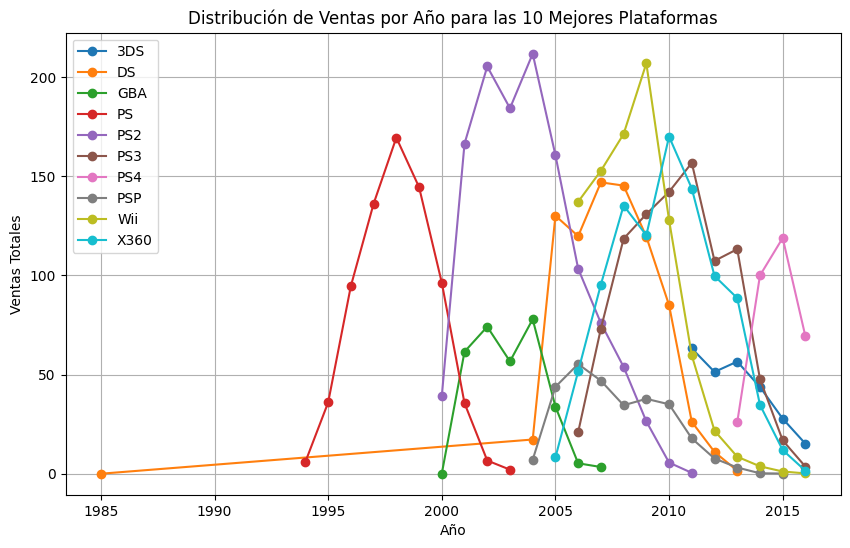

+ PS2:
Fue líder en ventas durante varios años, con ventas significativas desde 2000 hasta 2005.
A partir de 2006, las ventas comenzaron a disminuir drásticamente, llegando a ser muy bajas en 2011 y después desconocidas.
+ PS3:
Comenzó en 2006 con ventas modestas y aumentó progresivamente hasta 2011.
A partir de 2012, las ventas comenzaron a declinar y para 2016 ya eran muy bajas.
+ X360: 
Inició ventas en 2005 con un crecimiento constante hasta 2010.
Después de 2010, las ventas empezaron a declinar rápidamente.

### Análisis general:
PS2 tuvo un ciclo de vida muy exitoso pero declinante.
PS3 y X360 mostraron patrones similares: un crecimiento ascendente seguido de una disminución en ventas a medida que avanzaban los años.
Implicaciones para la campaña de 2017:
PS2 ya estaba fuera del mercado activo en 2017 debido a sus ventas desconocidas o casi nulas en años anteriores.
PS3 y X360 estaban en declive en 2016, por lo que invertir en estas plataformas para una campaña en 2017 podría no haber sido tan efectivo como enfocarse en plataformas con un crecimiento sostenido o emergentes, como PS4 o tal vez la Nintendo 3DS dependiendo de su desempeño específico en 2016.
Basándonos en estos datos, tomar decisiones para una campaña en 2017 habría implicado enfocarse en plataformas más activas y en crecimiento, dejando de lado aquellas en declive o fuera del mercado.


### Plataformas potencialmente rentables
En base a los resultados de la tabla "platform_sales" escogemos 3 plataformas potencialmente rentables, las cuales son: "PS4", "PC" y "XOne".

Para tener mas detalles sobre ellas, se filtrará el DataFrame original para que nos muestre la información de las plataformas pontencialmente rentables.

In [63]:

# Se crea una lista con las plataformas seleccionadas 
potential_platforms_selected = ["PS4", "PC", "XOne"]

potential_platforms = platform_sales_per_year[platform_sales_per_year["platform"].isin(potential_platforms_selected)]
potential_platforms



,platform,year,total_sales
93,PC,1985.0,0.04
94,PC,1988.0,0.03
95,PC,1992.0,3.03
96,PC,1994.0,12.87
97,PC,1995.0,4.22
98,PC,1996.0,10.58
99,PC,1997.0,11.27
100,PC,1998.0,3.26
101,PC,1999.0,4.74
102,PC,2000.0,4.66


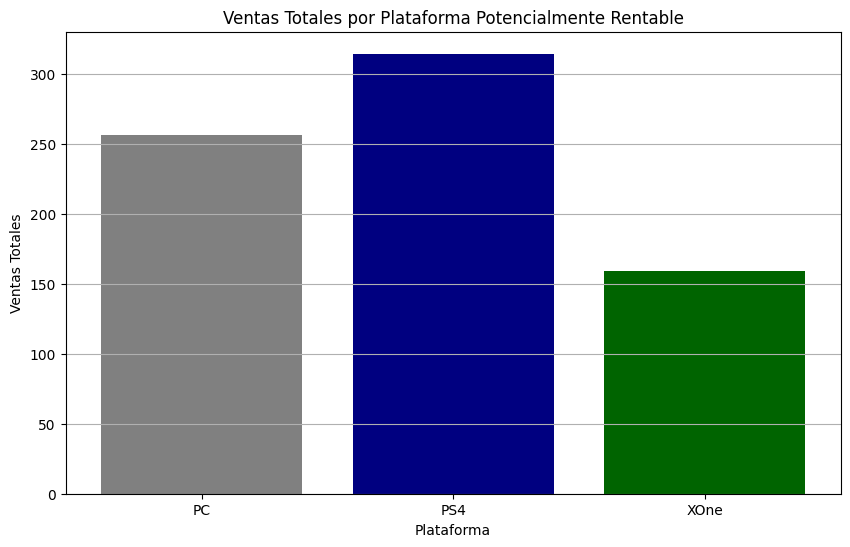

In [64]:
# Determinar dimensiones personalizadas del gráfico
plt.figure(figsize=(10, 6))

# Agrupar los datos por plataforma y sumar las ventas totales por plataforma
sales_per_platform = potential_platforms.groupby('platform')['total_sales'].sum()

# Crear el gráfico de barras
plt.bar(sales_per_platform.index, sales_per_platform.values, color=['gray', 'navy', 'darkgreen'])
plt.xlabel('Plataforma')
plt.ylabel('Ventas Totales')
plt.title('Ventas Totales por Plataforma Potencialmente Rentable')
plt.grid(axis='y')  # Agregar líneas de cuadrícula en el eje Y
plt.show()

En base a los resultados de la tabla "potential_platforms" y el gráfico de barras recién creado, se concluye que:

### PS4:
+ Experimentó un lanzamiento exitoso en 2013 con 25.99 millones de ventas.
+ Las ventas aumentaron significativamente en 2014 y 2015, alcanzando los 100.00 y 118.90 millones respectivamente.
+ En 2016, hasta la información disponible, las ventas disminuyeron a 69.25 millones, pero estos valores no reflejan el rendimiento completo del año.
### PC:
+ Muestra un patrón de ventas fluctuantes a lo largo de los años.
+ Mostró un pico en ventas en 2011 con 35.03 millones, pero ha disminuido desde entonces.
+ Los datos disponibles para 2016 muestran 5.25 millones, pero al igual que con PS4, estos valores no reflejan todo el año.
### XOne:
+ Inició con 18.96 millones en 2013 y mostró un crecimiento en ventas hasta 2015.
+ En 2016, con datos incompletos, las ventas fueron de 26.15 millones, lo que indica una disminución desde el año anterior, pero no se tiene en cuenta toda la información del año.

Estas plataformas se consideran potencialmente rentables para 2017 por varios motivos:

+ Historial Sólido: PS4 ha mantenido un rendimiento estable durante varios años, lo que indica su fortaleza en el mercado.
+ Presencia Sostenida: A pesar de las fluctuaciones, la PC ha mantenido una presencia constante en la industria y sigue siendo una plataforma relevante.
+ Posibilidad de Recuperación: Aunque XOne podría estar mostrando signos de estabilización en ventas, un enfoque estratégico y contenido relevante podría impulsar su recuperación.

En resumen, las tres plataformas tienen potencial para seguir siendo rentables en 2017, pero requieren estrategias específicas adaptadas a sus respectivas tendencias y fortalezas para mantener e impulsar su posición en el mercado de videojuegos.

# Ventas Globales de todos los Juegos desglosados por Plataformas 

¿Son significativas las diferencias en las ventas? 

¿Qué sucede con las ventas promedio en varias plataformas? 

In [65]:
# Se realiza el mismo proceso de "platform_sales_per_year", a diferencia que en ese caso agrupamos por el nombre del videojuego y no por el año.
platform_sales_per_game = video_games.groupby(["platform","name"])["total_sales"].sum().sort_values(ascending=False).reset_index()
platform_sales_per_game

,platform,name,total_sales
0,Wii,Wii Sports,82.54
1,NES,Super Mario Bros.,40.24
2,Wii,Mario Kart Wii,35.52
3,Wii,Wii Sports Resort,32.77
4,GB,Pokemon Red/Pokemon Blue,31.38
...,...,...,...
16705,PC,Wall-E,0.01
16706,PC,War for the Overworld,0.01
16707,X360,Turbo: Super Stunt Squad,0.01
16708,PS2,SCORE International Baja 1000: The Official Game,0.00


## Creación de diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma. 

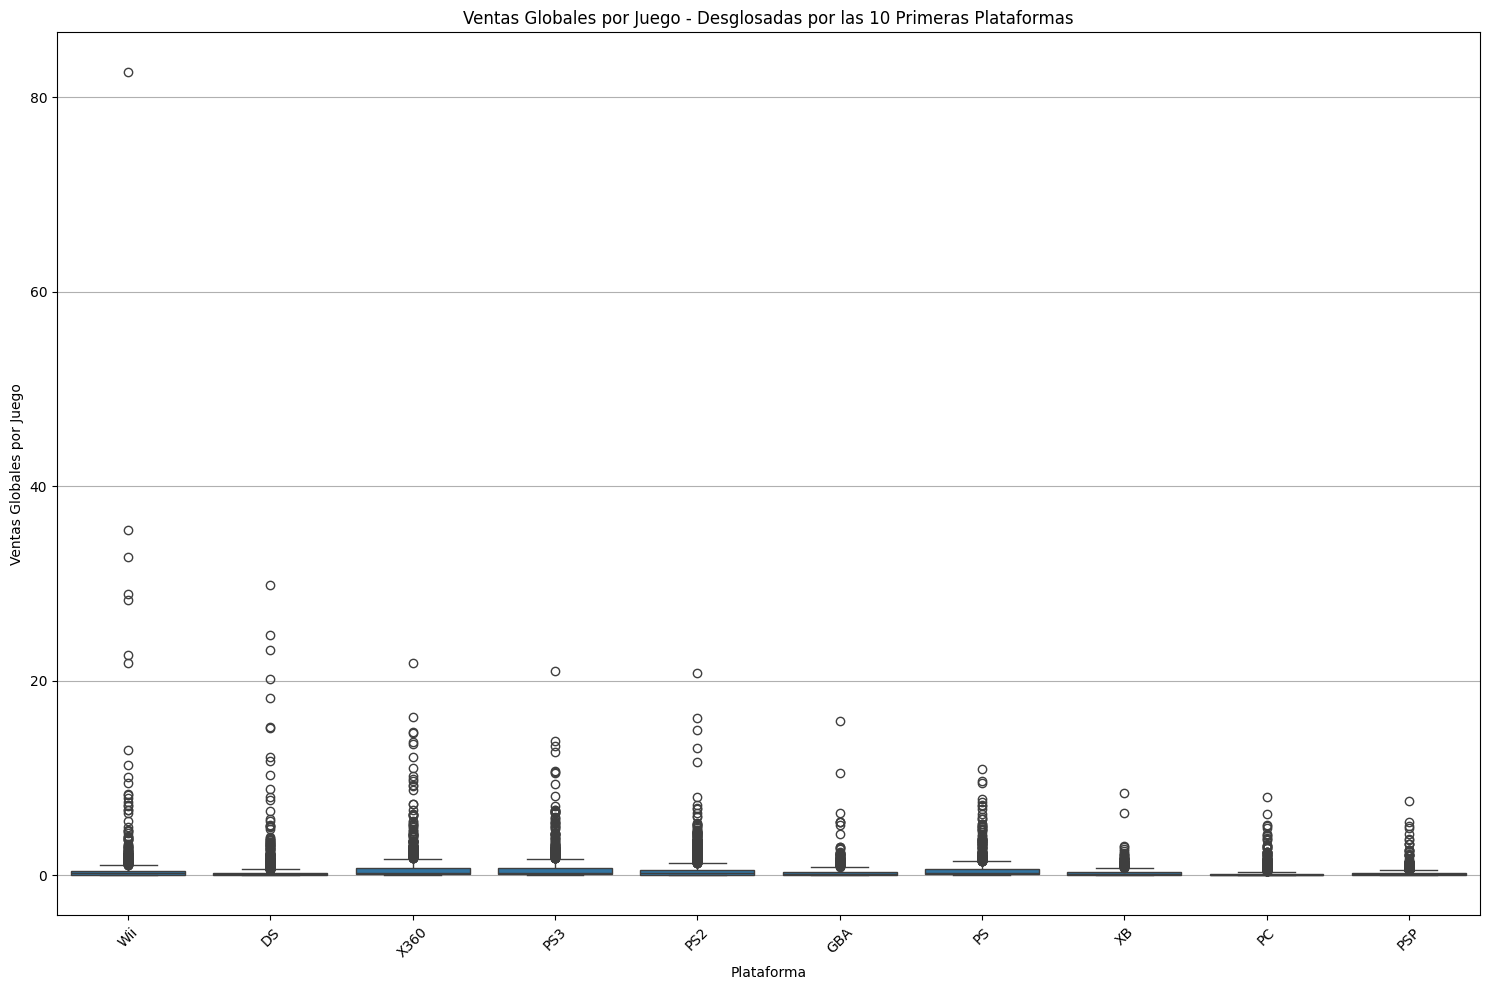

In [66]:
# Filtrar las 10 primeras plataformas
top_10_platforms = platform_sales_per_game['platform'].value_counts().head(10).index
filtered_platform_sales_per_game = platform_sales_per_game[platform_sales_per_game['platform'].isin(top_10_platforms)]

# Crear el diagrama de caja
plt.figure(figsize=(15, 10))
sns.boxplot(x='platform', y='total_sales', data=filtered_platform_sales_per_game)
plt.xlabel('Plataforma')
plt.ylabel('Ventas Globales por Juego')
plt.title('Ventas Globales por Juego - Desglosadas por las 10 Primeras Plataformas')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mayor claridad
plt.grid(axis='y')  # Agregar líneas de cuadrícula en el eje Y
plt.tight_layout()  # Ajustar el diseño del gráfico
plt.show()

Para saber que sucede con las ventas promedio en distintas plataformas se crea un gráfico que muestre la distribución de estos valores.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


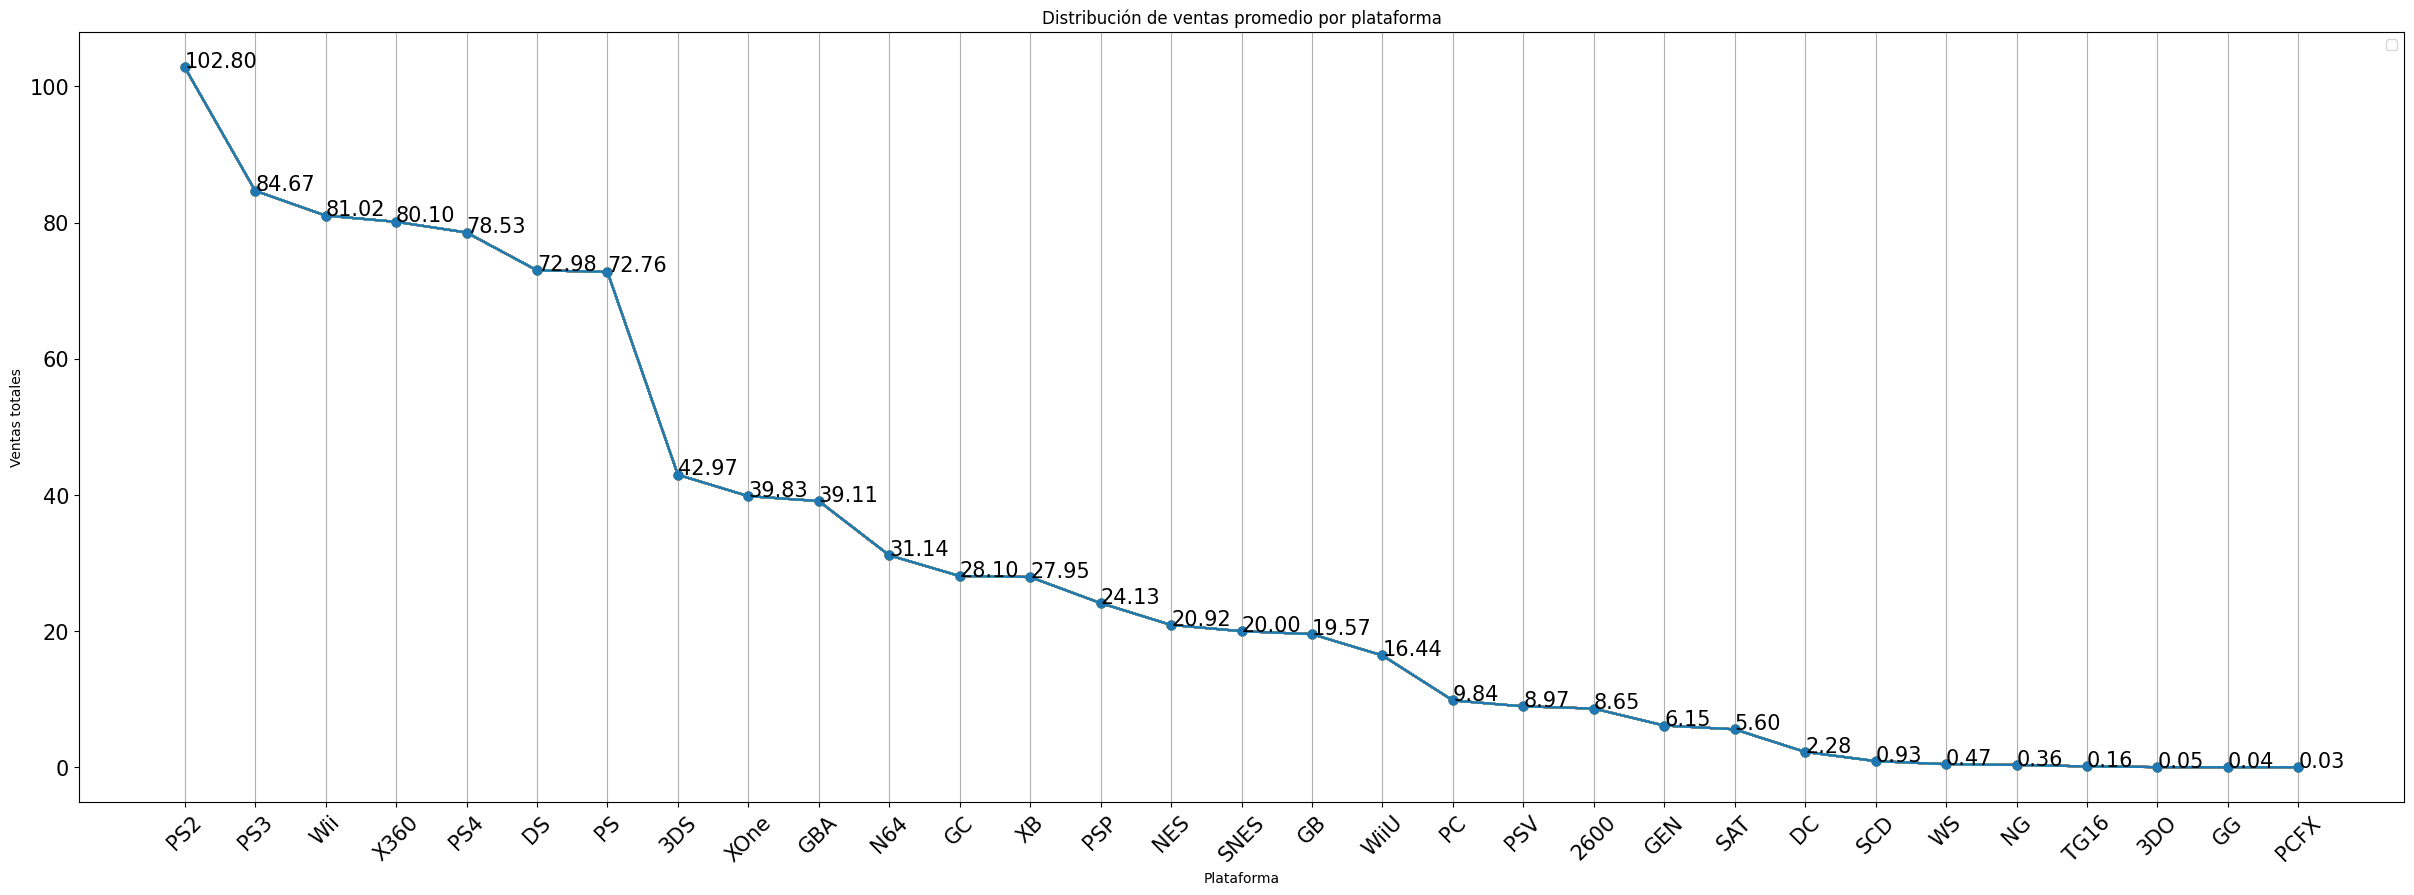

In [67]:
# Se crea una nueva variable para tener las ventas promedio de cada plataforma 
mean_sales_platforms = platform_sales_per_year.groupby("platform")["total_sales"].mean().sort_values(ascending=False).reset_index()

# Se crea un gráfico de líneas para visualizar la distribución de las ventas promedio por plataformas
plt.figure(figsize=(30,10))
for platform,platform_data in mean_sales_platforms.groupby("platform"):
    plt.plot(mean_sales_platforms["platform"],mean_sales_platforms["total_sales"], marker="o")

# Agregar etiquetas de valor para cada punto
for index, row in mean_sales_platforms.iterrows():
    # Utilizar plt.text() para agregar una etiqueta de texto en el gráfico
    # row["platform"]: posición x del texto, corresponde a la plataforma
    # row["total_sales"]: posición y del texto, corresponde a las ventas totales de la plataforma
    # f'{row["total_sales"]:.2f}': formato del texto con dos decimales
    # fontsize=8: tamaño de la fuente de la etiqueta
    # ha='right': alineación horizontal a la derecha del texto
    plt.text(row["platform"], row["total_sales"], f'{row["total_sales"]:.2f}', fontsize=15, ha='left')

plt.xlabel('Plataforma')
plt.ylabel('Ventas totales')
plt.title('Distribución de ventas promedio por plataforma')
plt.xticks(rotation=45, fontsize= 15)
plt.yticks(fontsize=15)
plt.legend()
plt.grid(axis="x")
plt.show()


Observando las ventas promedio en varias plataformas, se pueden hacer varias observaciones:

1. Plataformas dominantes: Algunas plataformas, como PS2, PS3, Wii, y X360, tienen ventas promedio significativamente más altas que otras. Esto sugiere que estas plataformas fueron muy exitosas en términos de ventas.

2. Tendencia a la baja: Las ventas promedio tienden a disminuir a lo largo de las plataformas. Plataformas más recientes, como PS4, 3DS, XOne, y WiiU, tienen ventas promedio más bajas en comparación con las plataformas más antiguas como PS2 y PS3. Esto podría indicar un cambio en las preferencias del consumidor o en la dinámica del mercado.

3. Variedad en las ventas promedio: Existe una gran variabilidad en las ventas promedio entre plataformas. Mientras que algunas plataformas tienen ventas sólidas, otras tienen cifras mucho más bajas, incluso llegando a valores cercanos a cero.

4. Plataformas de juegos portátiles: Las plataformas de juegos portátiles, como DS, PSP, y 3DS, tienen ventas promedio en un rango medio. Aunque no alcanzan las altas cifras de algunas consolas de sobremesa, muestran un nivel de aceptación en el mercado.

5. Plataformas menos exitosas: Algunas plataformas, como 3DO, GG, y PCFX, tienen ventas promedio muy bajas. Esto podría indicar que estas plataformas no tuvieron éxito comercial.

En resumen, los datos revelan patrones interesantes en las ventas promedio de diferentes plataformas a lo largo del tiempo, lo que puede proporcionar información valiosa sobre las tendencias y la popularidad de las consolas de videojuegos.








## Las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular?


Para esto se utiliza una plataforma de elección personal y escogí la PS3 ya que en una de las más famosas de la historia.

In [68]:
# A partir del Df original se crea "play_station" que muestra toda la información sobre losjuegos de PS3
play_station = video_games[video_games["platform"] == "PS3"]
# Se crea scores_and_sales_ps agrupando los juegos por las puntuaciones tanto de críticos como usuarios. 
# Se extraen las ventas totales y se ordenan de manera descendiente. 
scores_and_sales_ps = play_station.groupby(["name","user_score","critic_score"])["total_sales"].sum().sort_values(ascending=False).reset_index()

Para conclusiones mas significativas se crea un gráfico de dispersión y se calcula la correlación entre las reseñas y las ventas. 

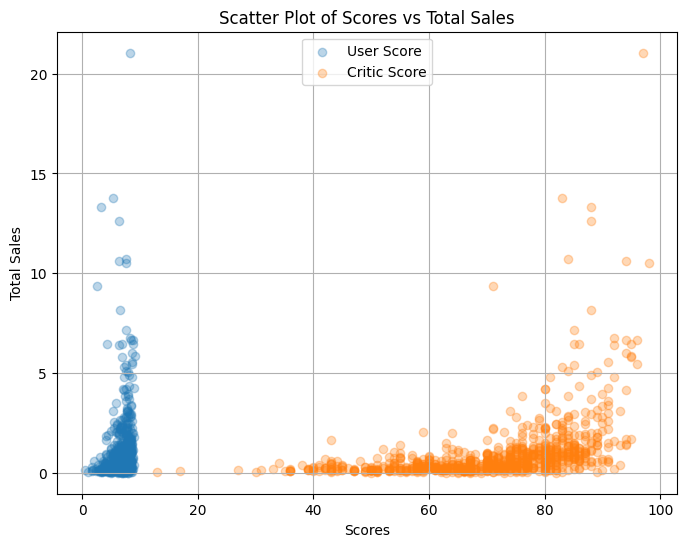

In [69]:
# Generar el gráfico de dispersión
plt.figure(figsize=(8, 6))
plt.scatter(scores_and_sales_ps['user_score'], scores_and_sales_ps['total_sales'], label='User Score', alpha=0.3)
plt.scatter(scores_and_sales_ps['critic_score'], scores_and_sales_ps['total_sales'], label='Critic Score', alpha=0.3)
plt.xlabel('Scores')
plt.ylabel('Total Sales')
plt.title('Scatter Plot of Scores vs Total Sales')
plt.legend()
plt.grid(True)
plt.show()


In [70]:
# Calcular la correlación entre las reseñas y las ventas
correlation_user_ps = scores_and_sales_ps['user_score'].corr(scores_and_sales_ps['total_sales'])
correlation_critic_ps = scores_and_sales_ps['critic_score'].corr(scores_and_sales_ps['total_sales'])

print(f"Correlación entre User Score y Total Sales: {correlation_user_ps}")
print(f"Correlación entre Critic Score y Total Sales: {correlation_critic_ps}")

Correlación entre User Score y Total Sales: 0.14151996222516916
Correlación entre Critic Score y Total Sales: 0.4283917594583477


Las correlaciones proporcionadas indican la fuerza y la dirección de la relación lineal entre las variables involucradas. 

1. Correlación entre User Score y Total Sales (0.1415):
La correlación positiva (cerca de cero) sugiere que hay una relación débil entre las calificaciones de usuarios y las ventas totales de la plataforma.
No se observa una conexión sólida entre las opiniones de los usuarios y el rendimiento en ventas. Esto podría deberse a que otros factores, como el marketing, el catálogo de juegos, o la popularidad general de la plataforma, pueden influir más en las ventas que las calificaciones de los usuarios.

2. Correlación entre Critic Score y Total Sales (0.4284):
La correlación positiva (cerca de 0.43) indica que hay una relación moderada entre las calificaciones de los críticos y las ventas totales de la plataforma.
La relación sugiere que, en general, las plataformas con calificaciones más altas de los críticos tienden a tener mayores ventas totales. Esto puede indicar que las opiniones profesionales pueden tener un impacto más significativo en las decisiones de compra de los consumidores que las calificaciones de usuarios.

+ Consideraciones:
Las correlaciones no implican causalidad. Aunque existe una relación estadística, no se puede afirmar que las buenas calificaciones (ya sea de usuarios o críticos) causen automáticamente mayores ventas. Pueden existir otros factores no considerados en el análisis. La relación más fuerte con las calificaciones de críticos podría deberse a la percepción de que las revisiones profesionales son más objetivas y, por lo tanto, más influyentes en las decisiones de compra. Se podría explorar más a fondo la influencia relativa de otras variables (como el catálogo de juegos exclusivos, el precio de la plataforma, la competencia en el mercado, etc.) para obtener una comprensión más completa de los factores que afectan las ventas.

En resumen, mientras que las calificaciones de los usuarios muestran una correlación débil con las ventas, las calificaciones de los críticos tienen una correlación moderada. Esto sugiere que las opiniones profesionales pueden desempeñar un papel más importante en las decisiones de compra de los consumidores en comparación con las calificaciones de usuarios. Sin embargo, es esencial considerar múltiples factores para obtener una imagen completa.

### Teniendo en cuenta las conclusiones, se comparan las ventas en otras plataformas

Las plataformas seleccionas para comparar la correlación entre las puntuaciones y ventas son: "XOne" y "Wii"

In [71]:
# Se realiza el mismo proceso anterior para las plataformas "XOne" y "Wii"
xbox = video_games[video_games["platform"] == "XOne"]
wii = video_games[video_games["platform"]=="Wii"]
scores_and_sales_xb = xbox.groupby(["name","user_score","critic_score"])["total_sales"].sum().sort_values(ascending=False).reset_index()
scores_and_sales_wii = wii.groupby(["name", "critic_score", "user_score"])["total_sales"].sum().sort_values(ascending=False).reset_index()

In [72]:
correlation_user_xb = scores_and_sales_xb['user_score'].corr(scores_and_sales_xb['total_sales'])
correlation_critic_xb = scores_and_sales_xb['critic_score'].corr(scores_and_sales_xb['total_sales'])
correlation_user_wii = scores_and_sales_wii["user_score"].corr(scores_and_sales_wii["total_sales"])
correlation_critic_wii = scores_and_sales_wii["critic_score"].corr(scores_and_sales_wii["total_sales"])

print(f"Correlación entre User Score y Total Sales para Xone: {correlation_user_xb} y para Wii: {correlation_user_wii} ")
print(f"Correlación entre Critic Score y Total Sales para XOne: {correlation_critic_xb} y para Wii: {correlation_critic_wii}")

Correlación entre User Score y Total Sales para Xone: -0.09400318326920866 y para Wii: 0.11015051136372718 
Correlación entre Critic Score y Total Sales para XOne: 0.41042203561296375 y para Wii: 0.16966766766756458


1. Correlación entre User Score y Total Sales:

Para "PS3": 0.1415

Para "XOne": -0.0940

Para "Wii": 0.1102

2. Correlación entre Critic Score y Total Sales:

Para "PS3": 0.4284

Para "XOne": 0.4104

Para "Wii": 0.1697

### Conclusiones Generales:

Luego de considerar las correlaciones entre las reseñas de usuarios y profesionales con las ventas totales en las plataformas "PS3", "XOne" y "Wii", podemos llegar a las siguientes conclusiones generales:

1. Calificaciones de Usuarios:

En las tres plataformas, "PS3", "XOne" y "Wii", las correlaciones entre las calificaciones de usuarios y las ventas totales son, en general, débiles o prácticamente inexistentes.
No hay una tendencia clara que sugiera que las calificaciones de usuarios tengan un impacto significativo en las ventas de estas plataformas.

2. Calificaciones de Críticos:

Hay una relación moderada entre las calificaciones de críticos y las ventas totales en "PS3" y "XOne".
En "Wii", la correlación positiva con las calificaciones de críticos es débil, indicando una relación más tenue en comparación con las otras dos plataformas.

3. Comparación entre Plataformas:

Las correlaciones sugieren que las opiniones profesionales pueden tener un impacto más significativo en las ventas que las calificaciones de usuarios en estas plataformas específicas.
La influencia de las calificaciones de críticos es más consistente entre "PS3" y "XOne", mientras que en "Wii" es más débil.

4. Otros Factores:

Es importante tener en cuenta que las correlaciones no implican causalidad, y otros factores como el catálogo de juegos, la estrategia de marketing, la competencia en el mercado y otros elementos pueden estar influyendo en las ventas.

En resumen, las opiniones profesionales, representadas por las calificaciones de críticos, parecen tener una relación más fuerte con las ventas en comparación con las calificaciones de usuarios en estas plataformas. Sin embargo, la influencia exacta varía entre las plataformas, y otros factores también juegan un papel importante en el rendimiento comercial.

# Distribución General de los juegos por Género 

¿Qué se puede decir de los géneros más rentables? 

¿Puedes generalizar acerca de los géneros con ventas altas y bajas?

In [73]:
# Contar la cantidad de juegos por género
genre_count = video_games['genre'].value_counts().reset_index()

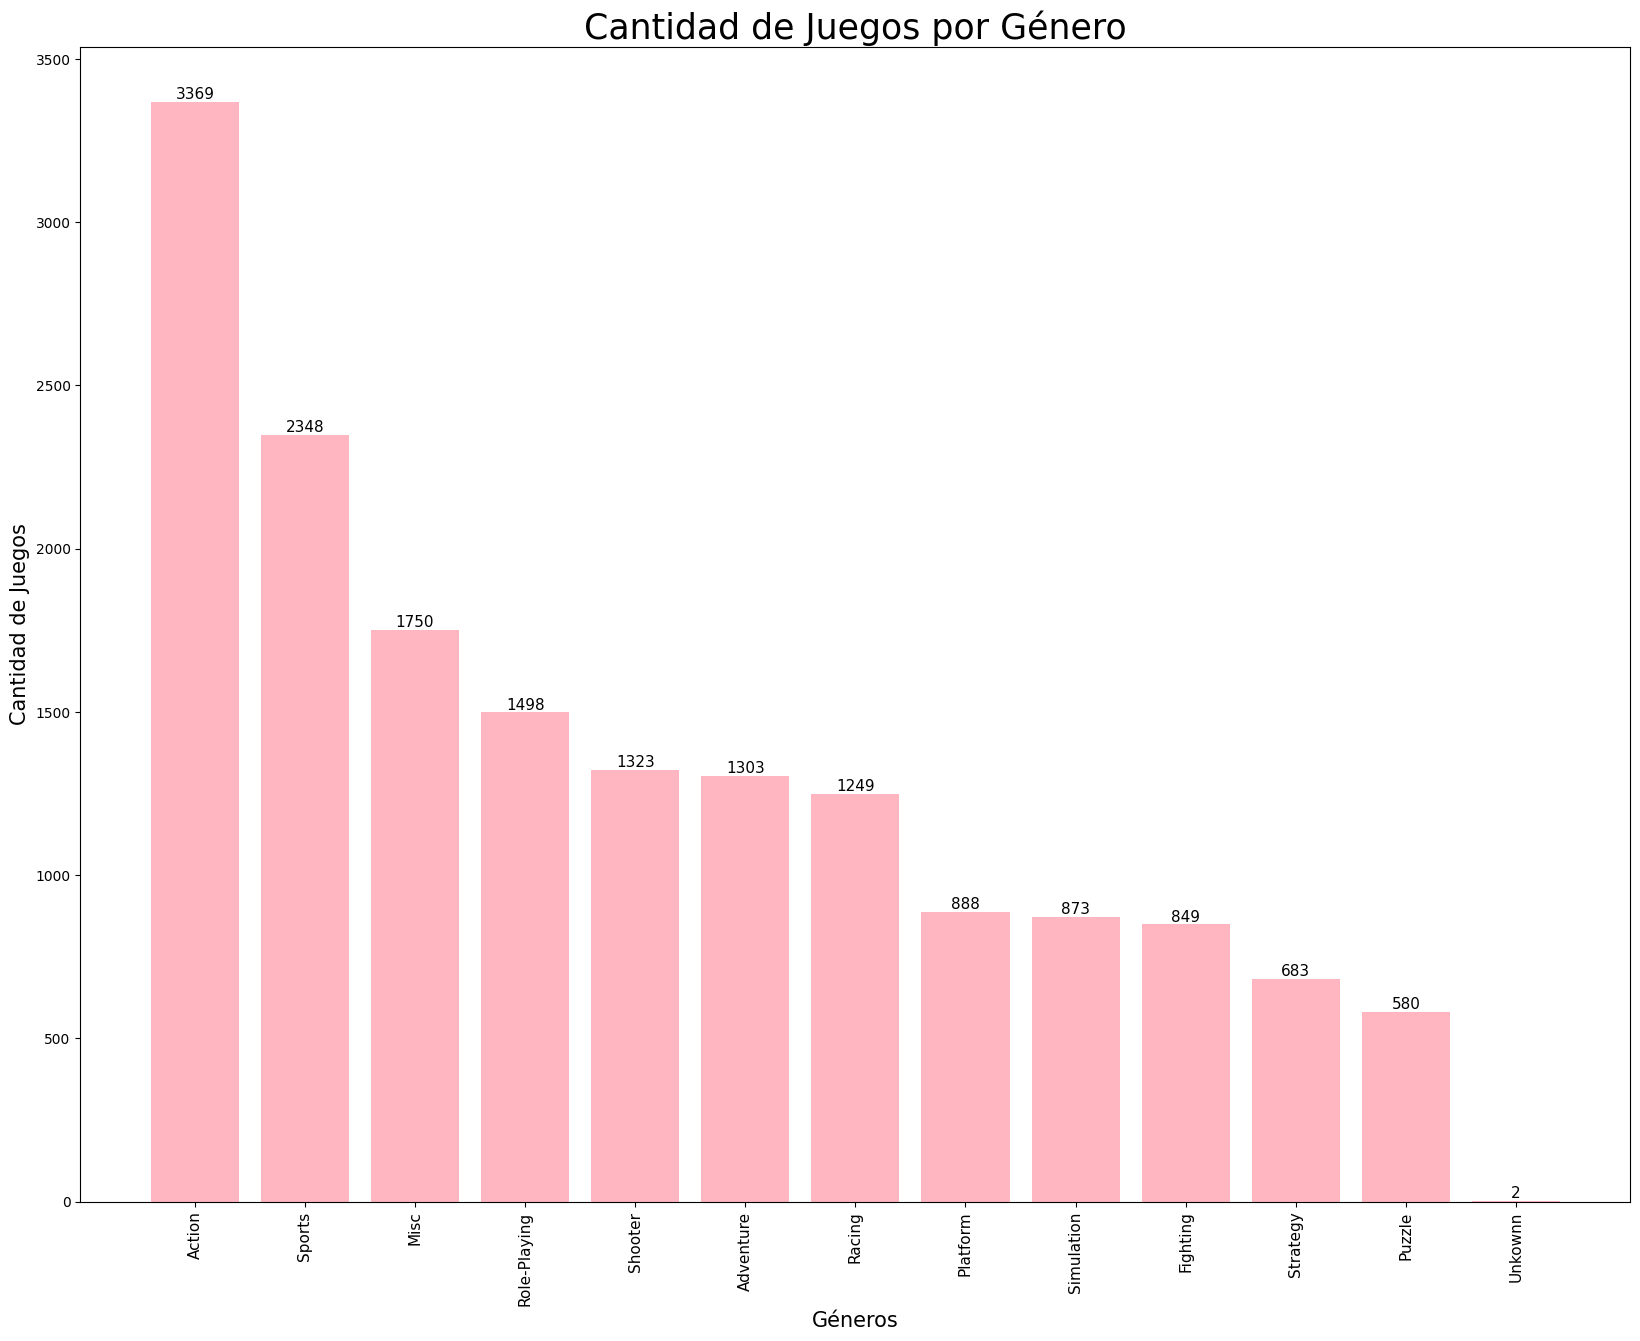

In [74]:
plt.figure(figsize=(20,15))
bars = plt.bar(genre_count["genre"],genre_count["count"], color="lightpink")
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', fontsize=11)

plt.title("Cantidad de Juegos por Género", fontsize=25)
plt.title("Cantidad de Juegos por Género", fontsize=25)
plt.xlabel("Géneros", fontsize=15)
plt.ylabel("Cantidad de Juegos", fontsize=15)
plt.xticks(rotation=90, fontsize=11)
plt.show()


1. Dominancia de Géneros Populares:

Los géneros más populares parecen ser Action, Sports y Misc, que tienen recuentos significativamente más altos que otros géneros.
Se podría argumentar que centrar la campaña en estos géneros puede alcanzar a una audiencia más amplia debido a su popularidad.

2. Enfoque en Géneros Específicos:

Si la campaña se dirige a un público más específico, como amantes de los juegos de rol (Role-Playing) o shooters, hay una cantidad considerable de juegos en estos géneros.

3. Oportunidades en Géneros Menos Populares:

Géneros como Puzzle, Strategy y Fighting tienen recuentos más bajos, pero podrían representar oportunidades de nicho. Si la campaña está diseñada para atraer a audiencias más selectas, estos géneros pueden ser enfoques viables.

4. Exploración de Géneros Menos Conocidos:

La categoría "Unknown" tiene solo 2 juegos. Investigar y entender qué géneros están incluidos en esta categoría podría ser beneficioso para identificar oportunidades inexploradas o nichos emergentes.

5. Variedad de Géneros para Diversificar la Campaña:

Para una estrategia más diversificada, se podría considerar una campaña que abarque varios géneros, aprovechando la variedad para atraer a diferentes segmentos de la audiencia de juegos.

6. Enfoque en Plataformas Populares:

Además de los géneros, es importante considerar en qué plataformas se juegan estos juegos (por ejemplo, consolas, PC o móviles) para adaptar la estrategia publicitaria según las preferencias del público objetivo.

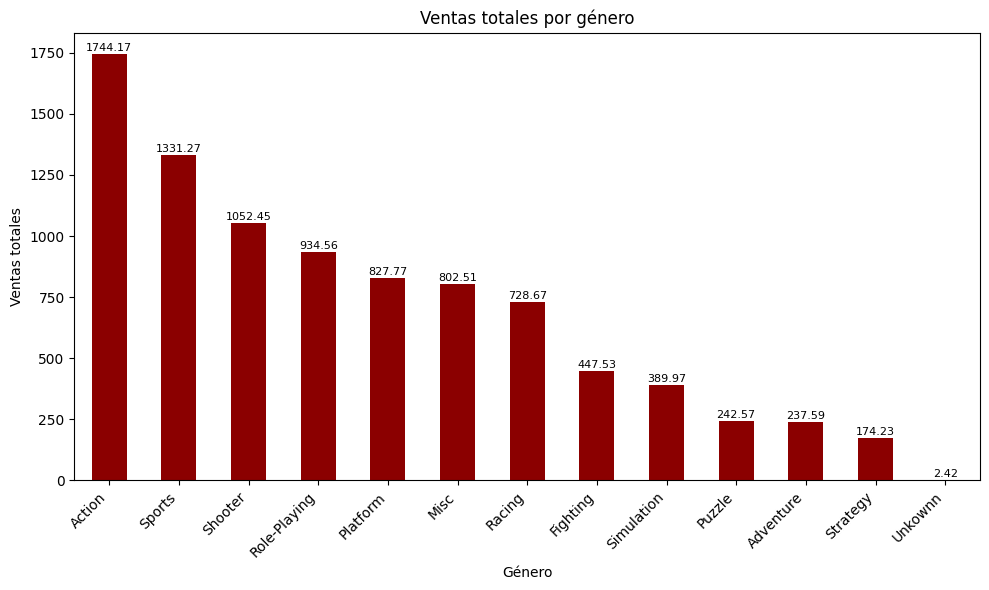

In [75]:
# Agrupar por género y sumar las ventas totales
genre_sales = video_games.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

# Crear un gráfico de barras para mostrar las ventas totales por género
plt.figure(figsize=(10, 6))
bars = genre_sales.plot(kind='bar', color='DARKRED')
plt.title('Ventas totales por género')
plt.xlabel('Género')
plt.ylabel('Ventas totales')
plt.xticks(rotation=45, ha='right')

# Agregar etiquetas de valor en cada barra
for index, value in enumerate(genre_sales):
    plt.text(index, value + 5, str(round(value, 2)), ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

Vamos a analizar las ventas totales por género para obtener conclusiones significativas para una campaña publicitaria:

1. Rentabilidad por Género:

Action, Sports y Shooter son los géneros con las mayores ventas totales. Centrar la campaña en estos géneros podría ser beneficioso, ya que tienen un historial de rentabilidad.

2. Relación Ventas-Recuento:

Comparando las ventas totales con el recuento de juegos por género, se puede evaluar la rentabilidad promedio por juego. Géneros con menos juegos pero altas ventas (como Shooter) podrían indicar una mayor rentabilidad por título.

3. Enfoque en Géneros de Nicho:

Aunque algunos géneros tienen ventas totales más bajas, como Puzzle y Strategy, podrían representar oportunidades de nicho. Una campaña enfocada en estos géneros podría captar la atención de un público específico.

4. Diversificación para Maximizar Ganancias:

Al igual que con la distribución por género, una campaña diversificada que abarque varios géneros puede ser efectiva para maximizar las ganancias y atraer a diferentes segmentos de la audiencia.

5. Análisis de Rentabilidad por Plataforma:

Considerar la rentabilidad por plataforma también es esencial. Algunos géneros pueden destacar en ciertas plataformas, y adaptar la estrategia publicitaria en consecuencia puede ser clave.

6. Investigación sobre Género "Unknown":

La categoría "Unknown" tiene ventas totales mínimas. Investigar y entender qué géneros están incluidos en esta categoría podría proporcionar información sobre áreas inexploradas o subgéneros emergentes.
E
7. Estrategias Adicionales para Géneros Populares:

Géneros como Action y Sports son altamente populares tanto en recuento como en ventas. Se pueden considerar estrategias adicionales, como colaboraciones con títulos destacados o eventos temáticos, para capitalizar aún más su popularidad.

In [76]:
# Se crea un nuevo data frame "best_genres"
best_genres = video_games.groupby(["genre"])["total_sales"].sum().sort_values(ascending=False).reset_index()

genres = pd.merge(genre_count, best_genres, on='genre')
# Cambiar el nombre de la columna "count" a "quantity"
genres.rename(columns={"count":"quantity"}, inplace=True)
# Calcular la venta promedio por juego para cada género
genres['mean_sales_per_game'] = genres['total_sales'] / genres['quantity']

# Mostrar el DataFrame resultante ordenado por la venta promedio por juego
genres = genres.sort_values(by='total_sales', ascending=False)
genres

,genre,quantity,total_sales,mean_sales_per_game
0,Action,3369,1744.17,0.517711
1,Sports,2348,1331.27,0.566980
4,Shooter,1323,1052.45,0.795503
3,Role-Playing,1498,934.56,0.623872
7,Platform,888,827.77,0.932173
2,Misc,1750,802.51,0.458577
6,Racing,1249,728.67,0.583403
9,Fighting,849,447.53,0.527126
8,Simulation,873,389.97,0.446701
11,Puzzle,580,242.57,0.418224


Vamos a analizar la venta promedio por juego para cada género:

1. Eficiencia de Géneros Populares:

Aunque Action y Sports tienen altos recuentos y ventas totales, la venta promedio por juego es relativamente baja en comparación con otros géneros. Esto podría indicar una mayor competencia en estos géneros y la necesidad de estrategias publicitarias más efectivas para destacar entre la oferta.

2. Rentabilidad de Géneros Específicos:

Shooter, Platform y Racing tienen ventas promedio por juego más altas. Enfocar la campaña en estos géneros puede resultar en una mayor rentabilidad por título, especialmente si se logra destacar en géneros menos saturados.

3. Oportunidades en Géneros Menos Populares:

Aunque Puzzle y Strategy tienen ventas totales más bajas, la venta promedio por juego es significativamente mejor que algunos géneros más populares. Esto sugiere que podrían ser áreas atractivas para campañas publicitarias que buscan rentabilidad por juego.

4. Investigación de Género "Unknown":

Aunque la categoría "Unknown" tiene solo dos juegos, la venta promedio por juego es relativamente alta. Investigar y entender qué géneros están incluidos en esta categoría podría proporcionar información valiosa sobre áreas inexploradas o subgéneros emergentes.

5. Adaptación de Estrategias para Géneros Variados:

Dado que la venta promedio por juego varía significativamente entre géneros, adaptar las estrategias publicitarias para cada género específico puede ser clave para maximizar el rendimiento de la campaña.

En resumen, la venta promedio por juego ofrece información valiosa sobre la eficiencia y rentabilidad de cada género. Al diseñar una campaña publicitaria, es esencial considerar estos datos junto con otros factores, como la popularidad general del género y la audiencia objetivo.

# Crear un perfil de usuario para cada región 


In [77]:
# Calcular métricas para el perfil de América del Norte (NA)
na_profile = video_games['na_sales'].describe()

# Calcular métricas para el perfil de Japón (JP)
jp_profile = video_games['jp_sales'].describe()

# Calcular métricas para el perfil de Europa (EU)
eu_profile = video_games['eu_sales'].describe()

# Mostrar los perfiles por región
print("Perfil de América del Norte (NA):")
print(na_profile)
print("\nPerfil de Japón (JP):")
print(jp_profile)
print("\nPerfil de Europa (EU):")
print(eu_profile)


Perfil de América del Norte (NA):
count    16715.000000
mean         0.263377
std          0.813604
min          0.000000
25%          0.000000
50%          0.080000
75%          0.240000
max         41.360000
Name: na_sales, dtype: float64

Perfil de Japón (JP):
count    16715.000000
mean         0.077617
std          0.308853
min          0.000000
25%          0.000000
50%          0.000000
75%          0.040000
max         10.220000
Name: jp_sales, dtype: float64

Perfil de Europa (EU):
count    16715.000000
mean         0.145060
std          0.503339
min          0.000000
25%          0.000000
50%          0.020000
75%          0.110000
max         28.960000
Name: eu_sales, dtype: float64


### América del Norte (NA):
Con una media de ventas totales de aproximadamente 0.26 millones de unidades por juego, América del Norte tiene un nivel de ventas significativo en comparación con Japón.

La presencia de valores altos en el percentil 75% y el valor máximo de 41.36 indica la existencia de títulos excepcionales que han tenido un rendimiento excepcionalmente alto en la región.

La dispersión de los datos (desviación estándar de 0.81) sugiere que hay una variabilidad considerable en las ventas totales entre los diferentes juegos.

### Japón (JP):
Japón tiene una media de ventas totales significativamente más baja en comparación con América del Norte, con alrededor de 0.08 millones de unidades por juego en promedio.

La mayoría de los juegos tienen ventas totales en el rango de 0 a 0.04 millones de unidades, como se evidencia por los valores bajos en los percentiles 50% y 75%.

La presencia de valores más altos en el percentil 75% y el valor máximo de 10.22 indica que, aunque menos comunes, hay juegos que pueden tener un rendimiento notablemente alto 
en la región.

### Europa (EU):
Europa tiene una media de ventas totales intermedia en comparación con América del Norte y Japón, con aproximadamente 0.15 millones de unidades por juego en promedio.

Similar a América del Norte, Europa muestra una variabilidad considerable en las ventas totales, como se refleja en la desviación estándar.

Los valores más altos en el percentil 75% y el valor máximo de 28.96 sugieren que, al igual que en América del Norte, hay juegos excepcionales que han tenido un rendimiento muy alto en la región.

### Conclusiones Generales:

América del Norte destaca como la región con la media más alta de ventas totales por juego, seguida por Europa y luego Japón.
Cada región tiene su propio perfil único en términos de ventas totales, con variabilidad significativa en los datos.
La existencia de valores extremadamente altos en los percentiles superiores y los máximos en todas las regiones destaca la importancia de algunos títulos excepcionales que han tenido un impacto significativo en las ventas totales en cada región.

### Las cinco plataformas principales. Describe las variaciones en sus cuotas de mercado de una región a otra.

In [78]:
# Agrupar por plataforma y sumar las ventas por región
platform_sales_by_region = video_games.groupby('platform')[['na_sales', 'jp_sales', 'eu_sales']].sum().reset_index()

# Calcular las ventas totales por plataforma sumando las ventas de las tres regiones
platform_sales_by_region['total_sales'] = platform_sales_by_region[['na_sales', 'jp_sales', 'eu_sales']].sum(axis=1)

# Encontrar las cinco plataformas principales por ventas totales en cada región
top_5_na = platform_sales_by_region.sort_values(by='na_sales', ascending=False).head(5)
top_5_jp = platform_sales_by_region.sort_values(by='jp_sales', ascending=False).head(5)
top_5_eu = platform_sales_by_region.sort_values(by='eu_sales', ascending=False).head(5)

print("Las cinco plataformas principales por ventas en América del Norte son:")
print(top_5_na[["platform","na_sales"]])

print("\nLas cinco plataformas principales por ventas en Japón son:")
print(top_5_jp[["platform","jp_sales"]])

print("\nLas cinco plataformas principales por ventas en Europa son:")
print(top_5_eu[["platform","eu_sales"]])


Las cinco plataformas principales por ventas en América del Norte son:
   platform  na_sales
28     X360    602.47
16      PS2    583.84
26      Wii    496.90
17      PS3    393.49
4        DS    382.40

Las cinco plataformas principales por ventas en Japón son:
   platform  jp_sales
4        DS    175.57
15       PS    139.82
16      PS2    139.20
23     SNES    116.55
2       3DS    100.67

Las cinco plataformas principales por ventas en Europa son:
   platform  eu_sales
16      PS2    339.29
17      PS3    330.29
28     X360    270.76
26      Wii    262.21
15       PS    213.61


### América del Norte (NA):
La Xbox 360 (X360) lidera en ventas en América del Norte, seguida muy de cerca por la PlayStation 2 (PS2) y la Wii.

La presencia de tres plataformas de diferentes fabricantes (Microsoft, Sony y Nintendo) en las cinco principales sugiere una diversidad en las preferencias de los jugadores.

La generación de consolas más antigua, representada por la PS2, sigue teniendo un impacto significativo en las ventas totales.

### Japón (JP):
La Nintendo DS (DS) encabeza las ventas en Japón, destacando la fuerte preferencia por consolas portátiles en esta región.

La presencia de plataformas históricas como la PlayStation (PS) y la Super Nintendo (SNES) muestra la influencia duradera de consolas antiguas en el mercado japonés.

La Nintendo 3DS (3DS) también figura en el top 5, lo que destaca la continuidad del éxito de las consolas portátiles de Nintendo en la región.

### Europa (EU):
La PlayStation 2 (PS2) lidera las ventas en Europa, seguida por la PlayStation 3 (PS3) y la Xbox 360 (X360).

Al igual que en América del Norte, la presencia de tres plataformas de diferentes fabricantes indica una diversidad en las preferencias de los jugadores en Europa.

La Wii, aunque presente en el top 5, tiene un impacto relativamente menor en comparación con América del Norte y Japón.

### Conclusiones Generales:
Las preferencias de plataforma varían significativamente entre las regiones, destacando la importancia de adaptar las estrategias de marketing a las preferencias locales.

La influencia de consolas antiguas en Japón sugiere una mayor apreciación por la historia y la tradición en el mercado japonés.

Las plataformas de Microsoft, Sony y Nintendo siguen siendo líderes en ventas en diferentes regiones, subrayando la importancia de estas compañías en la industria de los videojuegos.

### Los cinco géneros principales. Explica la diferencia.

In [79]:
genre_sales_by_region = video_games.groupby("genre")[["na_sales","jp_sales","eu_sales"]].sum().reset_index()
genre_sales_by_region["total_sales"] = genre_sales_by_region[["na_sales","jp_sales","eu_sales"]].sum(axis=1)
top_eu_genres = genre_sales_by_region.sort_values(by="eu_sales", ascending=False).head(5)
top_na_genres = genre_sales_by_region.sort_values(by="na_sales", ascending=False).head(5)
top_jp_genres = genre_sales_by_region.sort_values(by="jp_sales", ascending=False).head(5)

print('Los géneros mas populares de EU son:')
print(top_eu_genres[["genre","eu_sales"]])
print("\nLos géneros mas populares de NA son:")
print(top_na_genres[["genre","na_sales"]])
print("\nLos géneros mas populares de JP son:")
print(top_jp_genres[["genre","jp_sales"]])

Los géneros mas populares de EU son:
      genre  eu_sales
0    Action    519.13
10   Sports    376.79
8   Shooter    317.34
6    Racing    236.51
3      Misc    212.74

Los géneros mas populares de NA son:
       genre  na_sales
0     Action    879.01
10    Sports    684.43
8    Shooter    592.24
4   Platform    445.50
3       Misc    407.27

Los géneros mas populares de JP son:
           genre  jp_sales
7   Role-Playing    355.41
0         Action    161.43
10        Sports    135.54
4       Platform    130.83
3           Misc    108.11


### América del Norte (NA):
Dominio de Géneros de Acción y Deportes: Action y Sports son los géneros más populares en América del Norte, con ventas notables en comparación con otros géneros.

Fuerte Presencia de Shooters: Shooter ocupa el tercer lugar en popularidad, destacando la apreciación por los juegos de disparos en esta región.

Importancia de Plataformas: Aunque no es el género principal, Platform ocupa el cuarto lugar, sugiriendo una apreciación continua por los juegos de plataformas.

### Japón (JP):
Énfasis en los Juegos de Rol (Role-Playing): Role-Playing domina la preferencia de géneros en Japón, con ventas significativamente más altas que otros géneros.

Presencia de Géneros Populares a Nivel Mundial: Action, Sports y Platform también tienen una presencia notable, aunque en términos de ventas son relativamente más bajas en 
comparación con Role-Playing.

Importancia de Géneros Tradicionales: La presencia de Misc en el quinto lugar sugiere una apreciación por géneros más tradicionales o diversos.

### Europa (EU):
Similaridad con América del Norte: Los géneros más populares en Europa son Action y Sports, alineándose con las preferencias en América del Norte.

Destacada Preferencia por Shooters: Shooter ocupa el tercer lugar en popularidad en Europa, mostrando una fuerte atracción por los juegos de disparos similares a América del Norte.

Importancia de Racing: Racing ocupa el cuarto lugar en popularidad, indicando una apreciación por los juegos de carreras en esta región.

Diversidad de Preferencias: La presencia de Misc en el quinto lugar sugiere una diversidad de preferencias en Europa, similar a lo observado en Japón.

### Conclusiones Generales:

Acción y Deportes Globalmente Populares: Action y Sports son consistentemente populares en todas las regiones, destacando su atractivo global.

Roles Diferenciados para Géneros Específicos: Mientras que Shooter es fuerte en América del Norte y Europa, Role-Playing destaca en Japón. Esto resalta la importancia de 
comprender las preferencias culturales.

Diversidad de Preferencias en Europa y Japón: Europa y Japón exhiben una mayor diversidad en sus preferencias de género, con la inclusión de Misc en las listas de géneros populares.

Continuidad en la Apreciación de Géneros Tradicionales: La presencia de Platform en las listas de América del Norte y Japón sugiere una apreciación continuada por los juegos de plataformas en estas regiones.

### Si las clasificaciones de ESRB afectan a las ventas en regiones individuales.


Para llegar a una conclusión sobre si estas clasificaciones afectan las ventas, es necesario saber el significado de cada una.

1. EC (Early Childhood - Para niños pequeños): Contenido adecuado para niños de 3 años en adelante. Puede contener un mínimo de violencia animada y/o música fantasiosa.

2. E (Everyone - Para todos): Contenido adecuado para personas de todas las edades. Puede contener un mínimo de violencia animada y/o música fantasiosa.

3. E10+ (Everyone 10 and older - Para todos de 10 años en adelante): Puede contener más violencia animada, fantasía o contenido leve, más insinuaciones de juego de azar simulado o un lenguaje leve.

4. T (Teen - Adolescentes): Puede contener violencia, temas sugestivos, humor grosero, sangre mínima, apuestas simuladas o uso ocasional de lenguaje fuerte.

5. M (Mature - Maduro): Puede contener contenido adecuado solo para personas de 17 años en adelante. Puede incluir violencia intensa, sangre y gore, contenido sexual y/o lenguaje fuerte.

6. AO (Adults Only - Solo para adultos): Contenido solo para adultos. Puede incluir escenas prolongadas de violencia intensa, contenido sexual gráfico y/o juego de azar con dinero real.

7. RP (Rating Pending - Clasificación pendiente): El juego aún no ha sido clasificado por la ESRB. Esto puede ocurrir antes del lanzamiento oficial del juego.

+ La clasificación ESRB "K-A" fue utilizada antes de que el sistema de clasificación actual fuera establecido por la Entertainment Software Rating Board (ESRB). La designación "K-A" significaba "Kids to Adults" (Niños a Adultos) y fue utilizada para indicar que un juego era apropiado para todas las edades.
Sin embargo, en 1997, la ESRB revisó su sistema de clasificación y reemplazó la categoría "K-A" con "E" (Everyone) para indicar que un juego es apropiado para todas las edades. 

In [80]:
# Ya que se ha cambiado la clasificación "K-A" por "E", lo cambiamos en el dataframe original. 
video_games["rating"] = video_games["rating"].replace("K-A","E")
clasification = video_games.groupby("rating")[["na_sales","eu_sales","jp_sales","total_sales"]].sum().sort_values(by="total_sales", ascending=False).reset_index()
na_clasification = clasification.sort_values(by="na_sales", ascending=False)
eu_clasification = clasification.sort_values(by="eu_sales", ascending=False)
jp_clasification = clasification.sort_values(by="jp_sales", ascending=False)
print("Ventas en NA de acuerdo a las clasificaciones ESRB:")
print(na_clasification[["rating","na_sales"]])
print("\nVentas en EU de acuerdo a las clasificaciones ESRB:")
print(eu_clasification[["rating","eu_sales"]])
print("\nVentas en JP de acuerdo a las clasificaciones ESRB:")
print(jp_clasification[["rating","jp_sales"]])

Ventas en NA de acuerdo a las clasificaciones ESRB:
  rating  na_sales
1      E   1295.55
0     RP   1242.46
2      T    759.75
3      M    748.48
4   E10+    353.32
6     EC      1.53
5     AO      1.26

Ventas en EU de acuerdo a las clasificaciones ESRB:
  rating  eu_sales
1      E    710.52
0     RP    613.91
3      M    483.97
2      T    427.03
4   E10+    188.52
5     AO      0.61
6     EC      0.11

Ventas en JP de acuerdo a las clasificaciones ESRB:
  rating  jp_sales
0     RP    841.96
1      E    199.57
2      T    151.40
3      M     64.24
4   E10+     40.20
5     AO      0.00
6     EC      0.00


### América del Norte (NA):
Las clasificaciones "E" (Everyone) y "RP" (Rating Pending) tienen las ventas más altas en América del Norte, indicando que los juegos adecuados para todas las edades y aquellos con clasificación pendiente son los más populares en la región.

Aunque las clasificaciones "T" (Teen) y "M" (Mature) tienen ventas sólidas, no superan a las categorías "E" y "RP".

Las ventas de juegos con clasificación "AO" (Adults Only) y "EC" (Early Childhood) son muy bajas, sugiriendo una demanda limitada para juegos destinados a audiencias extremadamente jóvenes o adultas.

### Europa (EU):
La tendencia es similar en Europa, donde las clasificaciones "E" y "RP" lideran en ventas.

La clasificación "M" (Mature) tiene un impacto más significativo en las ventas en Europa en comparación con América del Norte, ocupando el tercer lugar en ventas.

Nuevamente, las clasificaciones "AO" y "EC" tienen ventas prácticamente nulas, indicando que la demanda de juegos para audiencias extremadamente jóvenes o adultas es baja.

### Japón (JP):
En Japón, la clasificación "RP" tiene las ventas más altas, seguida de cerca por la clasificación "E". Esto sugiere que los juegos con clasificación pendiente y los adecuados para todas las edades son muy populares en esta región.

Las clasificaciones "T" (Teen) y "M" (Mature) tienen un impacto menos significativo en Japón en comparación con América del Norte y Europa.

Al igual que en las otras regiones, las clasificaciones "AO" y "EC" tienen ventas prácticamente nulas, indicando una demanda limitada para juegos destinados a audiencias extremadamente jóvenes o adultas.

### Conclusiones Generales:
Las clasificaciones "E" y "RP" son consistentemente populares en todas las regiones, indicando una preferencia generalizada por juegos apropiados para todas las edades y aquellos con clasificación pendiente.
La clasificación "M" tiene un impacto más significativo en las ventas en América del Norte y Europa en comparación con Japón.
Las clasificaciones "AO" y "EC" tienen ventas extremadamente bajas en todas las regiones, sugiriendo una demanda muy limitada para juegos destinados a audiencias extremadamente jóvenes o adultas.

En general, las clasificaciones de ESRB parecen influir en las preferencias de los consumidores, y los juegos destinados a audiencias más amplias tienden a tener un rendimiento superior en términos de ventas en todas las regiones. Sin embargo, las diferencias en la aceptación de clasificaciones específicas pueden variar según la región, y adaptar estrategias de marketing a las preferencias locales puede ser clave para maximizar las ventas.

# Hipótesis 
### Prueba las siguientes hipótesis:
1. Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.
2. Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

### Primera Hipótesis
— Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

+ Hipótesis nula ($H_0$): Las calificaciones promedio de usuarios para Xbox One y PC son iguales.
+ Hipótesis alternativa ($H_1$): Las calificaciones promedio de usuarios para Xbox One y PC son diferentes.

In [81]:
user_score_xone = video_games["user_score"][(video_games["user_score"].notnull()) & (video_games["platform"] == "XOne") ]
user_score_pc = video_games["user_score"][(video_games["user_score"].notnull()) & (video_games["platform"] == "PC" )]
display(user_score_xone,user_score_pc)

165      7.9
179      5.4
242      6.4
270      6.2
373      4.1
        ... 
16544    6.8
16597    6.0
16630    8.2
16643    6.6
16660    6.7
Name: user_score, Length: 182, dtype: float64

85       7.6
138      7.3
192      4.0
218      8.2
284      9.1
        ... 
16681    8.1
16692    7.6
16696    5.8
16702    7.2
16705    5.8
Name: user_score, Length: 770, dtype: float64

Formulación de hipótesis nula y alternativa:
Hipótesis nula ($H_0$):
Se planteó inicialmente que las calificaciones promedio de usuarios para las plataformas Xbox One y PC son iguales. Esto se expresa como: "μ_xone = μ_pc", donde μ_xone es la calificación promedio de usuarios para Xbox One y μ_pc es la calificación promedio de usuarios para PC.

Hipótesis alternativa ($H_1$):
La hipótesis alternativa se formuló asumiendo lo contrario a la hipótesis nula, es decir, que las calificaciones promedio de usuarios para Xbox One y PC son diferentes. Se expresó como: "μ_xone ≠ μ_pc".

Criterio utilizado para probar las hipótesis y por qué:
Se optó por utilizar una prueba t de Student para muestras independientes. Este criterio se eligió porque se está comparando la media de dos muestras diferentes (calificaciones promedio de usuarios para Xbox One y PC) y se desea saber si la diferencia entre las medias es estadísticamente significativa.

La prueba t permite determinar si la diferencia observada entre las medias de las muestras es probablemente una diferencia real o simplemente el resultado de la variabilidad aleatoria inherente a las muestras. Se evalúa a través del cálculo del valor p, que indica la probabilidad de obtener resultados tan extremos como los observados, asumiendo que la hipótesis nula es verdadera.

Si el valor p obtenido es menor que un nivel de significancia predefinido (generalmente 0.05), se rechaza la hipótesis nula y se concluye que hay evidencia suficiente para afirmar que las calificaciones promedio de usuarios para Xbox One y PC son diferentes, respaldando la hipótesis alternativa. En caso contrario, no hay suficiente evidencia para rechazar la hipótesis nula y se concluye que no hay diferencia significativa entre las calificaciones promedio de usuarios para ambas plataformas.

In [82]:

# Ejecutar la prueba t de Student para muestras independientes
results = st.ttest_ind(user_score_xone, user_score_pc, equal_var=False)

# Nivel de significancia
alpha = 0.05

# Imprimir los resultados
print("Valor p: ", results.pvalue)

# Comparar el valor p con el nivel de significancia para tomar una decisión
if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
    print("Hay evidencia estadística para afirmar que las calificaciones promedio son diferentes.")
else:
    print("No podemos rechazar la hipótesis nula")
    print("No hay suficiente evidencia estadística para afirmar que las calificaciones promedio son diferentes.")

Valor p:  4.935072360183574e-06
Rechazamos la hipótesis nula
Hay evidencia estadística para afirmar que las calificaciones promedio son diferentes.


### Resultados:
Valor p: 
4.935072360183574×10^−6

4.935072360183574×10^−6: Este valor p es extremadamente pequeño. Indica la probabilidad de obtener resultados tan extremos como los observados, suponiendo que la hipótesis nula es cierta. En este caso, el valor p es mucho menor que el nivel de significancia comúnmente utilizado de 0.05.

### Decisión: 
Dado que el valor p es menor que el nivel de significancia (α=0.05), rechazamos la hipótesis nula.

### Interpretación:
Rechazar la hipótesis nula significa que hay evidencia estadística para afirmar que las calificaciones promedio de usuarios para las plataformas Xbox One y PC son diferentes. Algunas conclusiones explicativas y significativas pueden ser:

Diferencia significativa: La pequeñez del valor p sugiere que la diferencia en las calificaciones promedio entre Xbox One y PC no es simplemente el resultado del azar o variabilidad. Hay una diferencia estadísticamente significativa.

Impacto práctico: Aunque es estadísticamente significativa, es importante considerar si la diferencia es también prácticamente significativa. Es decir, ¿la diferencia es lo suficientemente grande como para tener importancia en el mundo real?

Relevancia para usuarios o desarrolladores: Puede ser útil explorar las razones detrás de la diferencia en las calificaciones. ¿Está relacionada con la calidad del hardware, la experiencia del usuario, el catálogo de juegos, o algún otro factor?

Posibles acciones: Dependiendo del contexto y los objetivos, este hallazgo puede llevar a acciones específicas. Podría ser la base para investigaciones adicionales, mejoras en productos o cambios en estrategias de marketing.

En resumen, la conclusión principal es que hay suficiente evidencia estadística para afirmar que las calificaciones promedio de usuarios difieren entre las plataformas Xbox One y PC.

### Segunda Hipótesis 
--Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

+ Hipótesis nula ($H_0$): Las calificaciones promedio de usuarios para los géneros de Acción y Deportes son iguales.
+ Hipótesis alternativa ($H_1$): Las calificaciones promedio de usuarios para los géneros de Acción y Deportes son diferentes.

In [83]:
user_score_action = video_games["user_score"][(video_games["user_score"].notnull()) & (video_games["genre"] == "Action")]
user_score_sports = video_games["user_score"][(video_games["user_score"].notnull()) & (video_games["genre"] == "Sports")]
display(user_score_action,user_score_sports)

16       8.2
17       9.0
23       8.1
24       8.7
38       8.5
        ... 
16652    8.5
16654    5.1
16660    6.7
16663    2.4
16692    7.6
Name: user_score, Length: 1830, dtype: float64

0        8.0
3        8.0
13       7.7
15       7.4
77       4.3
        ... 
16450    4.5
16518    1.4
16528    6.9
16546    9.5
16643    6.6
Name: user_score, Length: 1103, dtype: float64

Formulación de hipótesis nula y alternativa:
Hipótesis nula ($H_0$):
Se planteó inicialmente que las calificaciones promedio de usuarios para los géneros de Acción y Deportes son iguales. Esto se expresa como: "μ_action = μ_sports", donde μ_action es la calificación promedio de usuarios para el género de Acción y μ_sports es la calificación promedio de usuarios para el género de Deportes.

Hipótesis alternativa ($H_1$):
La hipótesis alternativa se formuló asumiendo lo contrario a la hipótesis nula, es decir, que las calificaciones promedio de usuarios para los géneros de Acción y Deportes son diferentes. Se expresó como: "μ_action ≠ μ_sports".

Criterio utilizado para probar las hipótesis y por qué:
Para probar estas hipótesis, se optó por utilizar una prueba t de Student para muestras independientes. Esta prueba es adecuada cuando se quiere comparar las medias de dos muestras diferentes y determinar si la diferencia entre ellas es estadísticamente significativa.

El criterio de la prueba t es apropiado en este caso, ya que se busca comparar las calificaciones promedio de usuarios entre dos géneros diferentes (Acción y Deportes). La prueba calcula un valor p, que representa la probabilidad de obtener resultados tan extremos como los observados, suponiendo que la hipótesis nula es cierta.

Si el valor p resultante es menor que un nivel de significancia predefinido (generalmente 0.05), se rechaza la hipótesis nula en favor de la hipótesis alternativa, lo que significa que hay evidencia suficiente para afirmar que las calificaciones promedio de usuarios para los géneros de Acción y Deportes son diferentes. En caso contrario, no hay suficiente evidencia para rechazar la hipótesis nula y se concluye que no hay una diferencia significativa en las calificaciones promedio entre ambos géneros.

In [84]:
# Ejecutar la prueba t de Student para muestras independientes
results = st.ttest_ind(user_score_action, user_score_sports, equal_var=False)

# Nivel de significancia
alpha = 0.05

# Imprimir los resultados
print("Valor p: ", results.pvalue)

# Comparar el valor p con el nivel de significancia para tomar una decisión
if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
    print("Hay evidencia estadística para afirmar que las calificaciones promedio son diferentes.")
else:
    print("No podemos rechazar la hipótesis nula")
    print("No hay suficiente evidencia estadística para afirmar que las calificaciones promedio son diferentes.")

Valor p:  0.11483818791498286
No podemos rechazar la hipótesis nula
No hay suficiente evidencia estadística para afirmar que las calificaciones promedio son diferentes.


### Resultados:
Valor p: 0.11483818791498286: Este valor p es mayor que el nivel de significancia comúnmente utilizado de 0.05. Indica la probabilidad de obtener resultados tan extremos como los observados, suponiendo que la hipótesis nula es cierta.

### Decisión: 
Dado que el valor p es mayor que el nivel de significancia (α=0.05), no podemos rechazar la hipótesis nula.

### Interpretación:
No rechazar la hipótesis nula sugiere que no hay suficiente evidencia estadística para afirmar que las calificaciones promedio de usuarios son diferentes entre las plataformas Xbox One y PC. Algunas conclusiones explicativas y significativas pueden ser:

Falta de evidencia significativa: El valor p más alto indica que la diferencia en las calificaciones promedio entre Xbox One y PC podría deberse al azar o variabilidad, en lugar de diferencias sustanciales.

Posibles explicaciones: La falta de diferencia significativa puede atribuirse a varios factores, como similitudes en la experiencia del usuario, calidad del servicio, catálogo de juegos, etc.

Importancia práctica: Aunque no hay evidencia estadística significativa, es importante considerar si hay alguna diferencia prácticamente significativa. En algunos casos, incluso si no es estadísticamente significativa, una diferencia podría tener relevancia en el mundo real.

Revisión y continuación: Este resultado podría sugerir que, en términos de calificaciones promedio de usuarios, Xbox One y PC pueden ser percibidos de manera similar. Sin embargo, siempre es útil considerar contextos específicos y realizar análisis más detallados si es necesario.

En resumen, según los resultados y el valor p proporcionado, no hay suficiente evidencia estadística para afirmar que las calificaciones promedio de usuarios son diferentes entre las plataformas Xbox One y PC.

# Conclusión General:







Tras realizar análisis exhaustivos de datos relacionados con la industria de los videojuegos, abarcando aspectos como lanzamientos por año, desempeño de plataformas, tendencias de géneros y la influencia de reseñas en las ventas, se han extraído conclusiones fundamentales que pueden orientar estrategias para una campaña publicitaria en el año 2017.

1. Producción de Juegos:

La industria de los videojuegos ha demostrado ser activa y en constante evolución, con un promedio de 444 juegos lanzados por año a lo largo de 37 años. Sin embargo, la alta desviación estándar sugiere una variabilidad significativa en la cantidad de lanzamientos, lo que podría deberse a factores como cambios en las tendencias del mercado, ciclos de consolas, y otros elementos externos.

2. Plataformas Más Rentables:

Las plataformas de la serie Playstation han mostrado ciclos de vida con éxitos y declives. La información histórica indica que nuevas versiones suelen tardar alrededor de 3-4 años en alcanzar sus valores más altos en ventas, mientras que las antiguas plataformas experimentan disminuciones en un período similar debido a la competencia y la llegada de nuevas versiones.

Para la campaña de 2017, se concluye que PS2 ya estaba fuera del mercado activo, mientras que PS3 y X360 estaban en declive. Enfocarse en plataformas con un crecimiento sostenido o emergentes, como PS4 o Nintendo 3DS, sería más estratégico.

3. Modelo para el Año 2017:

Se propone construir un modelo basado en datos recopilados a partir de 2010, filtrando juegos con ventas globales superiores a 4 millones. Esta estrategia asegura la relevancia de los datos y su probabilidad de rentabilidad futura.

4. Ventas por Género:

Los géneros más populares como Action y Sports dominan en recuento, pero es crucial considerar la rentabilidad por juego. Géneros menos populares, como Puzzle y Strategy, podrían representar oportunidades de nicho.

5. Influencia de Reseñas en Ventas:

Las correlaciones entre las reseñas de usuarios/críticos y las ventas totales varían por plataforma. Aunque las opiniones profesionales parecen tener una relación más fuerte con las ventas, se destaca la importancia de considerar otros factores.

6. Venta Promedio por Género:
La venta promedio por juego revela eficiencias y rentabilidades distintas en cada género. Estrategias publicitarias deben adaptarse según estos datos para maximizar el rendimiento de la campaña.

En resumen, una campaña efectiva para el año 2017 debería centrarse en plataformas en crecimiento, considerar la rentabilidad por género, y adaptarse a las influencias de reseñas específicas de cada plataforma. La diversificación de estrategias, la atención a géneros de nicho, y la comprensión de las plataformas emergentes serán claves para el éxito en un mercado dinámico y competitivo.

Con la incorporación de los perfiles por región y las pruebas de hipótesis, la conclusión general del proyecto se fortalece aún más:

7. Ventas por Región:

América del Norte muestra el nivel más alto de ventas totales por juego, con una media de aproximadamente 0.26 millones de unidades. La presencia de títulos excepcionales destaca la robustez del mercado en esta región.
Japón presenta una media significativamente más baja de alrededor de 0.08 millones de unidades por juego. Aunque menos común, hay juegos con rendimientos notables en esta región.
Europa tiene una media intermedia de alrededor de 0.15 millones de unidades por juego. Al igual que en América del Norte, hay juegos excepcionales que han tenido un rendimiento muy alto.

8. Plataformas y Géneros Más Populares:

La diversidad en las preferencias de los jugadores se refleja en las principales plataformas por región. Mientras que la Xbox 360 lidera en América del Norte, la Nintendo DS domina en Japón, y la PlayStation 2 encabeza las ventas en Europa.
En términos de géneros más populares, Action y Sports son consistentemente destacados en todas las regiones, pero con variaciones en el orden de preferencia.

9. Clasificaciones ESRB:

Las clasificaciones ESRB muestran diferentes patrones en las ventas totales por región. Por ejemplo, en América del Norte, las ventas son más altas para clasificaciones "E" (Everyone), mientras que en Japón, las clasificaciones "RP" (Rating Pending) lideran en ventas.
Pruebas de Hipótesis:

+ La primera hipótesis, que afirmaba que las calificaciones promedio de usuarios para las plataformas Xbox One y PC son diferentes, fue respaldada por evidencia estadística significativa.

+ La segunda hipótesis, que afirmaba que las calificaciones promedio de usuarios para los géneros de Acción y Deportes son iguales, no cuenta con suficiente evidencia estadística para ser respaldada.

En conjunto, estos hallazgos ofrecen una visión más completa y detallada de la dinámica de la industria de los videojuegos, proporcionando información clave para la toma de decisiones en una campaña publicitaria. Se destaca la importancia de adaptar estrategias según las características específicas de cada región, plataforma, género y clasificación ESRB.